==================================================================================================================

##### **Graded Challenge 6**

###### Nama : Taliida Nabilah K.

###### Batch : HCK-013


###### **This project is made to predict the case of customers default payments from Big Query Dataset. This research employed binary variable where default payment (Yes = 1, No = 0), as the response variable. Objective of our project is to predict which customer might default in upcoming months**
==================================================================================================================

**Query SQL**

###### data = client.query('''

###### SELECT *

###### FROM `ftds-hacktiv8-project.phase1_ftds_013_hck.credit-card-information`

###### WHERE MOD(CUST_ID,2) !=0


###### ''').to_dataframe()

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np

#Preprocessing
from sklearn.preprocessing import StandardScaler

# Dimensionality Reduction using PCA
from sklearn.decomposition import PCA

# Cluster
from sklearn.cluster import KMeans

#Libraries Feature Engine
from feature_engine.outliers import Winsorizer

#Importing Libraries for Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

#Importing Libraries for Model Saving 
from joblib import load, dump
import pickle

**Data Loading**

In [2]:
data_original = pd.read_csv("P1G6_Set_1_Taliida.csv")
data = data_original.copy()

In [3]:
data_original.count()

CUST_ID                             4475
BALANCE                             4475
BALANCE_FREQUENCY                   4475
PURCHASES                           4475
ONEOFF_PURCHASES                    4475
INSTALLMENTS_PURCHASES              4475
CASH_ADVANCE                        4475
PURCHASES_FREQUENCY                 4475
ONEOFF_PURCHASES_FREQUENCY          4475
PURCHASES_INSTALLMENTS_FREQUENCY    4475
CASH_ADVANCE_FREQUENCY              4475
CASH_ADVANCE_TRX                    4475
PURCHASES_TRX                       4475
CREDIT_LIMIT                        4475
PAYMENTS                            4475
MINIMUM_PAYMENTS                    4320
PRC_FULL_PAYMENT                    4475
TENURE                              4475
dtype: int64

In [4]:
len(data_original['CUST_ID'].drop_duplicates())

4475

In [5]:
# 10 data pertama 

data.head(10)

CUST_ID     BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     3091    3.833185           0.125000      45.00             45.00   
1     5069    0.000000           0.000000     176.03            176.03   
2     6075  757.964752           0.875000     157.40            157.40   
3     6291  264.566591           0.375000    1150.00           1150.00   
4     7755  440.613643           1.000000     600.00            600.00   
5     8299  611.561026           1.000000     765.00            765.00   
6     8629    0.228572           0.125000      60.00             60.00   
7     8805  105.333584           0.375000     306.00            306.00   
8        7   16.379412           0.454545     178.15              0.00   
9       91  559.151424           1.000000      94.00             94.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    0.00           0.0                0.125   
1                    0.00           0.0                0.125   
2                    0.00           0.0                0.125   
3                    0.00           0.0                0.125   
4                    0.00           0.0                0.125   
5                    0.00           0.0                0.125   
6                    0.00           0.0                0.125   
7                    0.00           0.0                0.125   
8                  178.15           0.0                0.250   
9                    0.00           0.0                0.250   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.125                              0.00   
1                       0.125                              0.00   
2                       0.125                              0.00   
3                       0.125                              0.00   
4                       0.125                              0.00   
5                       0.125                              0.00   
6                       0.125                              0.00   
7                       0.125                              0.00   
8                       0.000                              0.25   
9                       0.250                              0.00   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                     0.0                 0              1         500.0   
1                     0.0                 0              1        7000.0   
2                     0.0                 0              6        1200.0   
3                     0.0                 0              1        1200.0   
4                     0.0                 0              1        1000.0   
5                     0.0                 0              1        2000.0   
6                     0.0                 0              1        1500.0   
7                     0.0                 0              2        6000.0   
8                     0.0                 0              3        5000.0   
9                     0.0                 0              3        5500.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0     0.000000               NaN          0.000000       8  
1     0.000000               NaN          0.000000       8  
2  1494.480376       2638.598410          0.000000       8  
3  3029.380326         85.428885          0.000000       8  
4   215.316424        137.846006          0.000000       8  
5   204.464151        146.352314          0.000000       8  
6   438.738982               NaN          0.000000       8  
7   101.986927        118.324082          0.000000       8  
8   229.376368         89.613822          0.181818      12  
9   254.733329        218.279194          0.000000      12

In [6]:
# 10 data terakhir 

data.tail(10)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
4465     6809  4438.521324           1.000000     591.84            109.16   
4466     7211  1135.703750           1.000000      92.07              0.00   
4467     8295   185.984965           0.454545     482.24            392.24   
4468     8855  3531.167073           0.900000     797.50            577.83   
4469     2389  1917.895730           1.000000     285.07            285.07   
4470     2345  9629.808851           1.000000       0.00              0.00   
4471     6785  1040.030221           1.000000       0.00              0.00   
4472     7347  1322.818587           1.000000       0.00              0.00   
4473     8447  1060.391273           1.000000       0.00              0.00   
4474     1995  3447.674222           1.000000     205.00            205.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
4465                  482.68    564.365429             0.636364   
4466                   92.07     81.509491             0.272727   
4467                   90.00    903.843591             0.272727   
4468                  219.67   5273.226918             0.700000   
4469                    0.00   6084.858872             0.363636   
4470                    0.00   4372.393835             0.000000   
4471                    0.00   1390.648290             0.000000   
4472                    0.00    762.301096             0.000000   
4473                    0.00   1475.858013             0.000000   
4474                    0.00   4548.057776             0.090909   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
4465                    0.181818                          0.454545   
4466                    0.000000                          0.181818   
4467                    0.181818                          0.090909   
4468                    0.400000                          0.500000   
4469                    0.363636                          0.000000   
4470                    0.000000                          0.000000   
4471                    0.000000                          0.000000   
4472                    0.000000                          0.000000   
4473                    0.000000                          0.000000   
4474                    0.090909                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
4465                0.272727                 3             11       17000.0   
4466                0.272727                 3              3        1200.0   
4467                0.272727                 8              8        1200.0   
4468                0.900000                33             21        4000.0   
4469                1.090909                28              6        3000.0   
4470                0.545455                 9              0       12000.0   
4471                0.545455                18              0        1400.0   
4472                0.545455                11              0        1500.0   
4473                0.545455                10              0        2000.0   
4474                0.545455                 7              1       10500.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
4465  5552.601399       1094.486286              0.00      11  
4466   355.798199        434.689529              0.00      11  
4467  2333.997439        160.900585              0.25      11  
4468  2979.546700       3052.080103              0.00      10  
4469  5692.682993        556.449635              0.00      11  
4470  2468.988022       2134.295731              0.00      11  
4471   290.129620        287.994171              0.00      11  
4472  1035.627320        312.835530              0.00      11  
4473   407.360560        277.084736              0.00      11  
4474   665.239171        817.844662              0.00      11

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

In [8]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    155
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

The data is consist of 4475 rows with 18 columns and 155 missing values in "Minimum_payment"

In [9]:
# Checking the percentage of missing data
(data.isnull().sum()/data['CUST_ID'].count())*100


CUST_ID                             0.000000
BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.000000
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    3.463687
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

the missing value on the data is only 3.5 percent of total data namely in "MINIMUM_PAYMENTS" column and the missing in these columns make up an insignificant percentage of the data set and can be safely deleted without risking a loss in data.

**EDA (Exploratory Data Analysis)**

Balance (Numerical)

C:\Users\ACER\AppData\Local\Temp\ipykernel_24920\1795497691.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['BALANCE'],bins=150, color='red')


Text(0.5, 0, 'Balance')

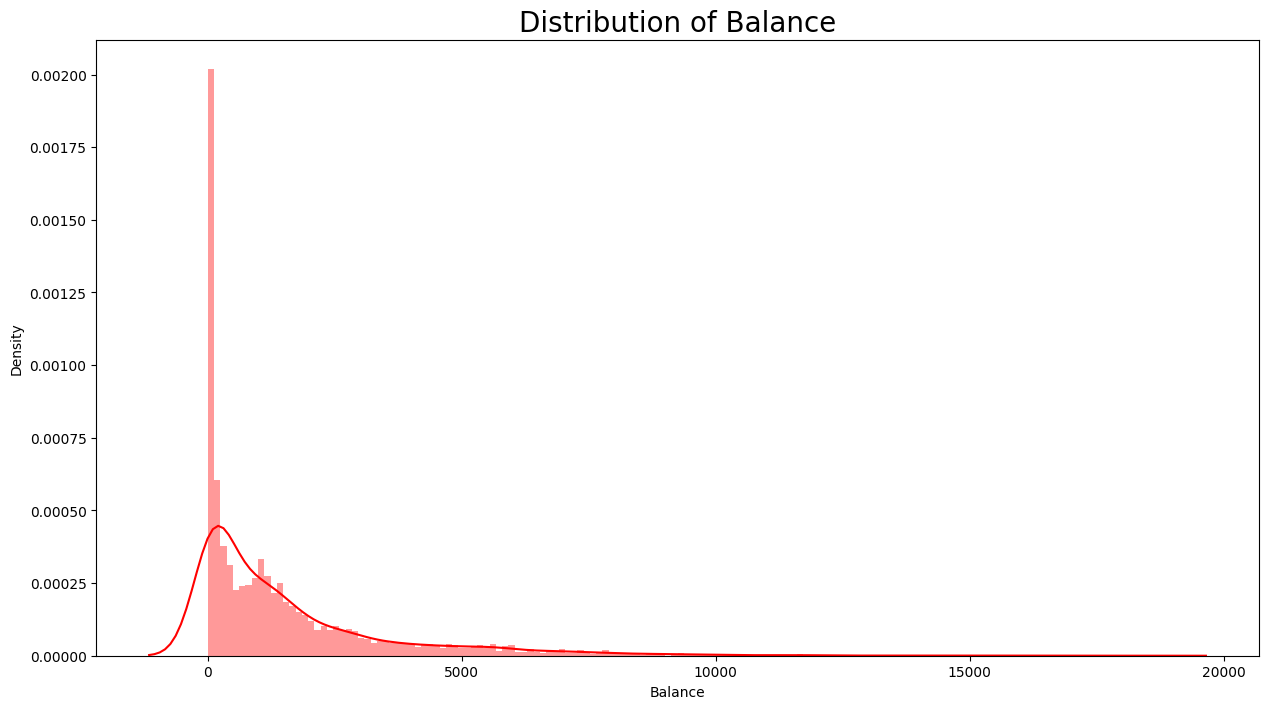

In [10]:
plt.rcParams['figure.figsize'] = (15,8)

sns.distplot(data['BALANCE'],bins=150, color='red')
plt.title('Distribution of Balance', size=20)
plt.xlabel('Balance')

The Bar above is visualize the distribution of the balance amount of the customer's have in the company in range 0 - 20.000. It shows that a lot more customer have 0 balance that have credit card where it  seems to be a very high number of credit card with 0 balance. This could be due because people are holding what is called "zero balance cards". The basic idea is that by keeping you balance low (in this case zero) but your credit limit high, this would increase your credit utilization ratio and in turn increases your credit score.

Balance Frequency (Numerical)

Text(0.5, 1.0, 'Counts of Balance Frequency Score')

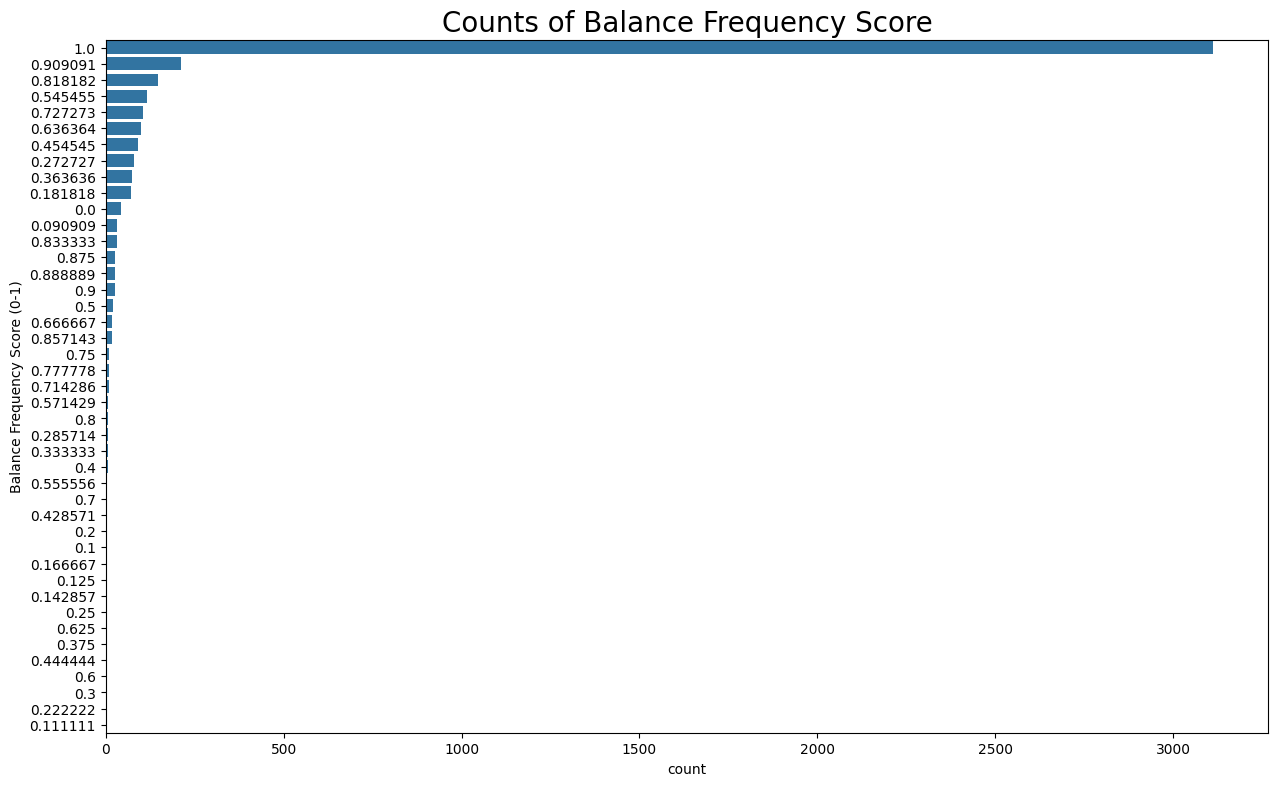

In [11]:
plt.rcParams['figure.figsize'] = (15,9)

sns.countplot(y=data['BALANCE_FREQUENCY'],order = data['BALANCE_FREQUENCY'].value_counts().index)
plt.ylabel('Balance Frequency Score (0-1)')
plt.title('Counts of Balance Frequency Score', fontsize=20)

Balance frequency is the score, 0-1, given to accounts based on how frequent the account's balances are updated. One being the highest score. So basically it is the measure of how frequent people use their credit card. As we can see here most of the accounts have the score of one, the best score, meaning that most people do use credit card frequently and only a small number of people keep their cards relatively inactive.

Purchases

C:\Users\ACER\AppData\Local\Temp\ipykernel_24920\3426621306.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['PURCHASES'], color='orange', bins=150)


Text(0.5, 0, 'Purchases')

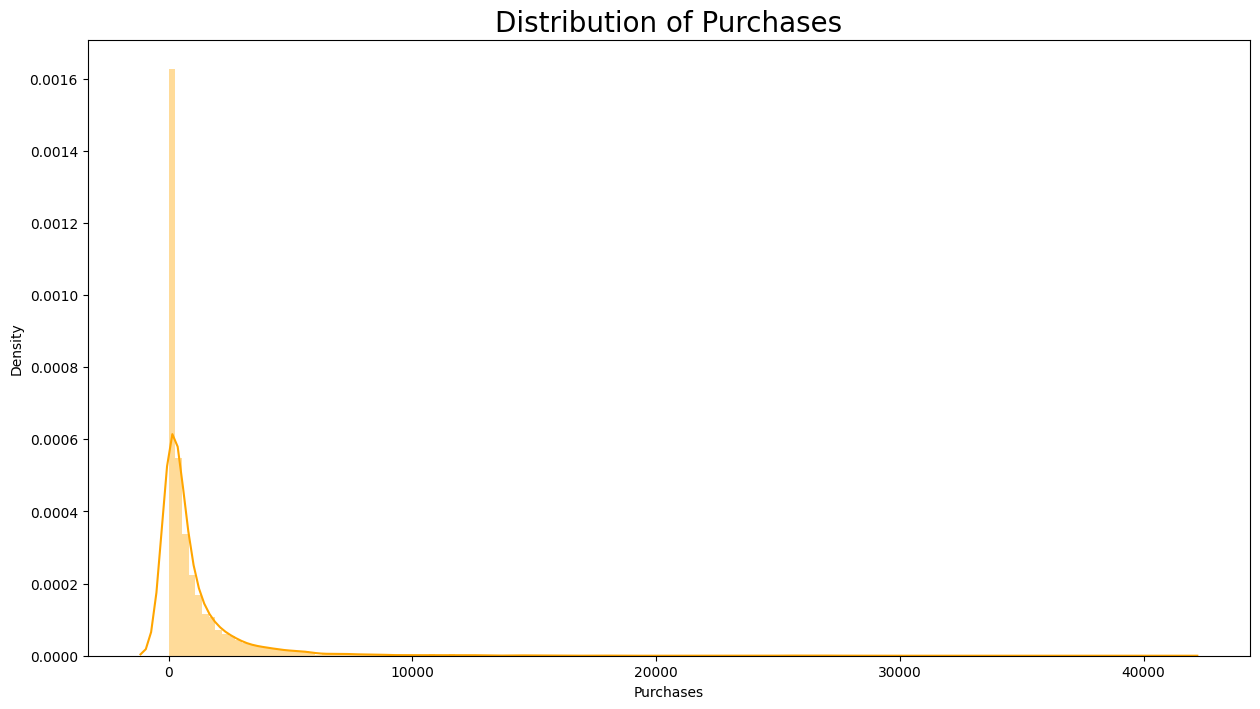

In [12]:
plt.rcParams['figure.figsize'] = (15,8)

sns.distplot(data['PURCHASES'], color='orange', bins=150)
plt.title('Distribution of Purchases', size=20)
plt.xlabel('Purchases')

A lot of people have the purchse amounts of 0 which is align becasue we also see that alot of people are holding zero balance cards.



Text(0.5, 1.0, 'Heat Map')

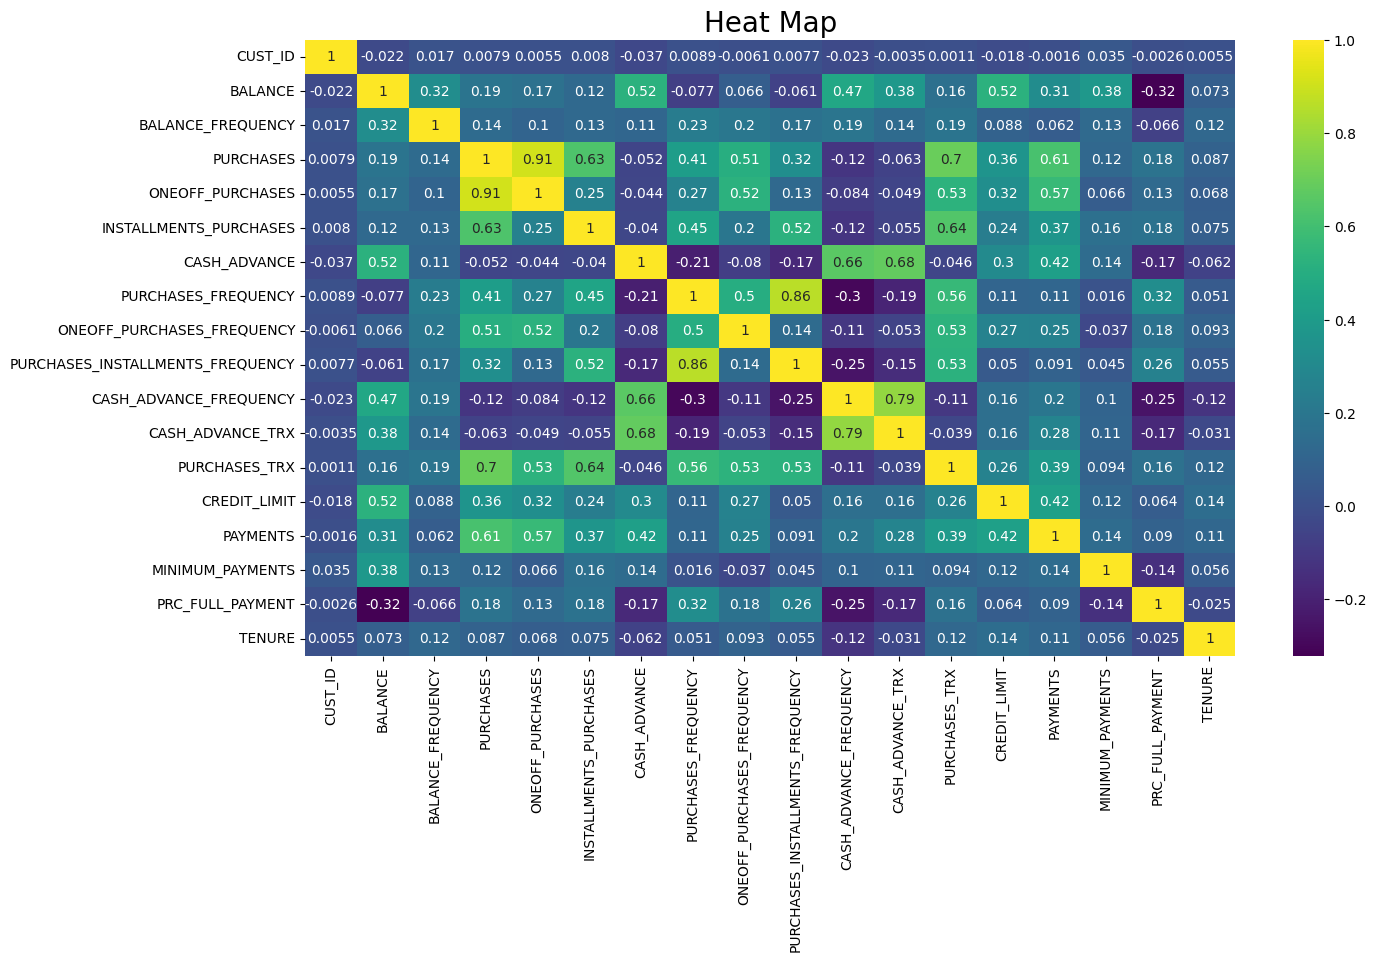

In [13]:
sns.heatmap(data.corr(), cmap='viridis', annot=True)
plt.title('Heat Map', fontsize =20)

We can see the correlation in the dataset. Purchases and one off purchase have very high correlation as we would expect at 0.91. This is the same for varaibles and their frequency score counter parts such as cash advance trx and cash advance frequency at 0.79. Not surprisingly things like balance and payment have poor correlation. This tell us that the data do make sense.

In [14]:
data.skew()

CUST_ID                              0.000000
BALANCE                              2.329009
BALANCE_FREQUENCY                   -2.026530
PURCHASES                            7.071706
ONEOFF_PURCHASES                     9.951057
INSTALLMENTS_PURCHASES               6.330630
CASH_ADVANCE                         5.638109
PURCHASES_FREQUENCY                  0.058755
ONEOFF_PURCHASES_FREQUENCY           1.548319
PURCHASES_INSTALLMENTS_FREQUENCY     0.508296
CASH_ADVANCE_FREQUENCY               1.834211
CASH_ADVANCE_TRX                     6.420104
PURCHASES_TRX                        4.747507
CREDIT_LIMIT                         1.498948
PAYMENTS                             5.747503
MINIMUM_PAYMENTS                    14.669771
PRC_FULL_PAYMENT                     1.975238
TENURE                              -2.954159
dtype: float64

Almost all the feature is skewed

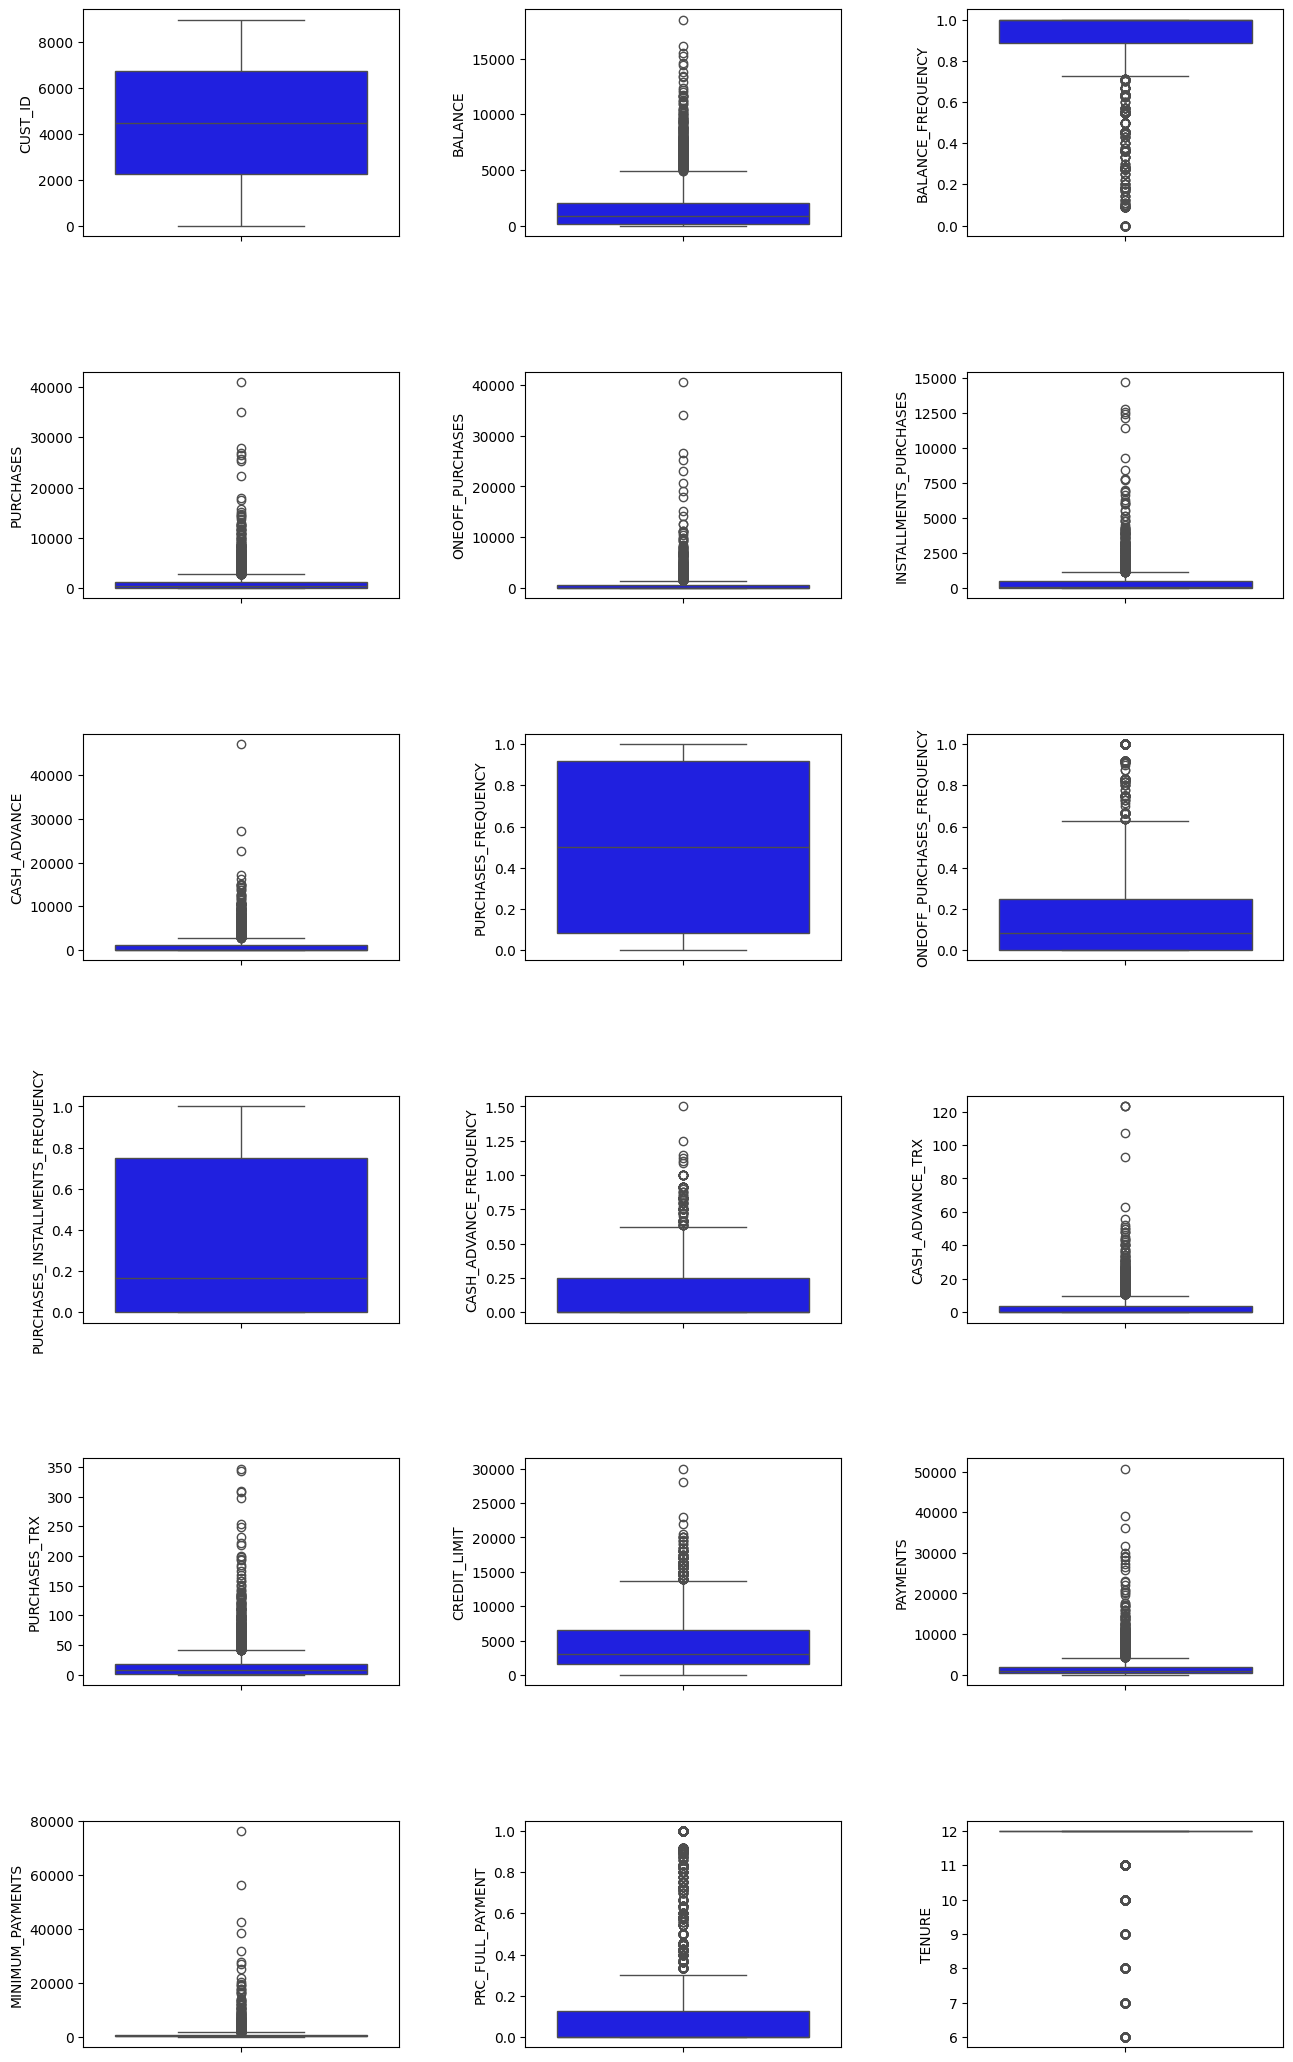

In [15]:

# Set the size of the overall figure
plt.figure(figsize=(15, 30))  # Increase figure height to accommodate longer titles

# Adjust the spacing between subplots
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.6)  # Adjust hspace as needed

# Iterate over each column in the DataFrame
for i, column in enumerate(data.columns, 1):
    # Create a subplot for each column
    plt.subplot(7, 3, i)
    
    # Create a vertical boxplot for the current column
    sns.boxplot(data[column], color='blue')

    # Rotate the x-axis labels to prevent overlap
    plt.xticks(rotation=45)


# Show the plot
plt.show()

Hampir semua data terdapat outliers yang akan dihandle di feature engineering

**Feature Engineering**

Drop Unused Columns

In [16]:
data.drop('CUST_ID', axis=1, inplace = True)

In [17]:
data

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0        3.833185              0.125      45.00             45.00   
1        0.000000              0.000     176.03            176.03   
2      757.964752              0.875     157.40            157.40   
3      264.566591              0.375    1150.00           1150.00   
4      440.613643              1.000     600.00            600.00   
...           ...                ...        ...               ...   
4470  9629.808851              1.000       0.00              0.00   
4471  1040.030221              1.000       0.00              0.00   
4472  1322.818587              1.000       0.00              0.00   
4473  1060.391273              1.000       0.00              0.00   
4474  3447.674222              1.000     205.00            205.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                        0.0      0.000000             0.125000   
1                        0.0      0.000000             0.125000   
2                        0.0      0.000000             0.125000   
3                        0.0      0.000000             0.125000   
4                        0.0      0.000000             0.125000   
...                      ...           ...                  ...   
4470                     0.0   4372.393835             0.000000   
4471                     0.0   1390.648290             0.000000   
4472                     0.0    762.301096             0.000000   
4473                     0.0   1475.858013             0.000000   
4474                     0.0   4548.057776             0.090909   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.125000                               0.0   
1                       0.125000                               0.0   
2                       0.125000                               0.0   
3                       0.125000                               0.0   
4                       0.125000                               0.0   
...                          ...                               ...   
4470                    0.000000                               0.0   
4471                    0.000000                               0.0   
4472                    0.000000                               0.0   
4473                    0.000000                               0.0   
4474                    0.090909                               0.0   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              1         500.0   
1                   0.000000                 0              1        7000.0   
2                   0.000000                 0              6        1200.0   
3                   0.000000                 0              1        1200.0   
4                   0.000000                 0              1        1000.0   
...                      ...               ...            ...           ...   
4470                0.545455                 9              0       12000.0   
4471                0.545455                18              0        1400.0   
4472                0.545455                11              0        1500.0   
4473                0.545455                10              0        2000.0   
4474                0.545455                 7              1       10500.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0        0.000000               NaN               0.0       8  
1        0.000000               NaN               0.0       8  
2     1494.480376       2638.598410               0.0       8  
3     3029.380326         85.428885               0.0       8  
4      215.316424        137.846006               0.0       8  
...           ...               ...               ...     ...  
4470  2468.988022       2134.295731               0.0      11  
4471   290.129620        287.994171               0.0      11  
4472  1035

colom CUST_ID didrop karena tidak berpengaruh dengan modeling

***Missing Value Handling***

In [18]:
data[data.notnull().any(axis=1)]

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0        3.833185              0.125      45.00             45.00   
1        0.000000              0.000     176.03            176.03   
2      757.964752              0.875     157.40            157.40   
3      264.566591              0.375    1150.00           1150.00   
4      440.613643              1.000     600.00            600.00   
...           ...                ...        ...               ...   
4470  9629.808851              1.000       0.00              0.00   
4471  1040.030221              1.000       0.00              0.00   
4472  1322.818587              1.000       0.00              0.00   
4473  1060.391273              1.000       0.00              0.00   
4474  3447.674222              1.000     205.00            205.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                        0.0      0.000000             0.125000   
1                        0.0      0.000000             0.125000   
2                        0.0      0.000000             0.125000   
3                        0.0      0.000000             0.125000   
4                        0.0      0.000000             0.125000   
...                      ...           ...                  ...   
4470                     0.0   4372.393835             0.000000   
4471                     0.0   1390.648290             0.000000   
4472                     0.0    762.301096             0.000000   
4473                     0.0   1475.858013             0.000000   
4474                     0.0   4548.057776             0.090909   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.125000                               0.0   
1                       0.125000                               0.0   
2                       0.125000                               0.0   
3                       0.125000                               0.0   
4                       0.125000                               0.0   
...                          ...                               ...   
4470                    0.000000                               0.0   
4471                    0.000000                               0.0   
4472                    0.000000                               0.0   
4473                    0.000000                               0.0   
4474                    0.090909                               0.0   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              1         500.0   
1                   0.000000                 0              1        7000.0   
2                   0.000000                 0              6        1200.0   
3                   0.000000                 0              1        1200.0   
4                   0.000000                 0              1        1000.0   
...                      ...               ...            ...           ...   
4470                0.545455                 9              0       12000.0   
4471                0.545455                18              0        1400.0   
4472                0.545455                11              0        1500.0   
4473                0.545455                10              0        2000.0   
4474                0.545455                 7              1       10500.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0        0.000000               NaN               0.0       8  
1        0.000000               NaN               0.0       8  
2     1494.480376       2638.598410               0.0       8  
3     3029.380326         85.428885               0.0       8  
4      215.316424        137.846006               0.0       8  
...           ...               ...               ...     ...  
4470  2468.988022       2134.295731               0.0      11  
4471   290.129620        287.994171               0.0      11  
4472  1035

In [19]:
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].median(), inplace=True)

Terdapat 155 missing value pada kolom "MINIMUM_PAYMENT" yang dihandle menggunakan nilai mediannya. Kita menggunakan nilai median karena data cenderung skewed dan ketika di cek, nilai mean dari minimum paymentnya cenderung sangat tinggi. 

In [20]:
# Checking the percentage of missing data
data.isnull().sum()


BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [21]:
categorical_column = [] 
one_identical_column = []

for i in data.columns :
    if len(data[i].drop_duplicates()) > 1 and len(data[i].drop_duplicates()) < 6 :
        print('list value dalam kolom',i,'adalah : \n', sorted(data[i].unique()),'\n')
        #Based on data analyzing for each column on i is categorical features
        categorical_column.append(i)
        #But if the value is only one identical value it wont be useful for modelling
    elif len(data[i].drop_duplicates()) == 1:
         one_identical_column.append(i)
     

# check the result
print(f'kolom dengan 1 value yang identik :',one_identical_column)
print(f'kolom cetegorical:',categorical_column)


kolom dengan 1 value yang identik : []
kolom cetegorical: []


***Outlier Handling***

In [22]:
## save column name on list skewed or not skewed
COLUMN_SKEWED = []
COLUMN_NOT_SKEWED = []
one_identical_column = []

# Checking skewness in DataFrame
for column in data.columns:
    if column not in categorical_column and column not in one_identical_column and column != 'TENURE':
        skewness = data[column].skew()
        if skewness >= 0.6 and skewness < 1.0:
            COLUMN_SKEWED.append(column)
            print(f"Skewness for column {column}: {skewness} (Moderate Positive Skewness)")
        elif skewness >= -1.0 and skewness <= -0.6:
            COLUMN_SKEWED.append(column)
            print(f"Skewness for column {column}: {skewness} (Moderate Negative Skewness)")
        elif skewness > 1.0:
            COLUMN_SKEWED.append(column)
            print(f"Skewness for column {column}: {skewness} (Highly Positive Skewness)")
        elif skewness < -1.0:
            COLUMN_SKEWED.append(column)
            print(f"Skewness for column {column}: {skewness} (Highly Negative Skewness)")
        else:
            COLUMN_NOT_SKEWED.append(column)
            print(f"Skewness for column {column}: {skewness} (No Skew)")

Skewness for column BALANCE: 2.3290088807150915 (Highly Positive Skewness)
Skewness for column BALANCE_FREQUENCY: -2.026529776439142 (Highly Negative Skewness)
Skewness for column PURCHASES: 7.071705718331177 (Highly Positive Skewness)
Skewness for column ONEOFF_PURCHASES: 9.951056583113456 (Highly Positive Skewness)
Skewness for column INSTALLMENTS_PURCHASES: 6.330629906494809 (Highly Positive Skewness)
Skewness for column CASH_ADVANCE: 5.638109294257693 (Highly Positive Skewness)
Skewness for column PURCHASES_FREQUENCY: 0.05875497991848613 (No Skew)
Skewness for column ONEOFF_PURCHASES_FREQUENCY: 1.5483193819148602 (Highly Positive Skewness)
Skewness for column PURCHASES_INSTALLMENTS_FREQUENCY: 0.5082957786202944 (No Skew)
Skewness for column CASH_ADVANCE_FREQUENCY: 1.8342106501962343 (Highly Positive Skewness)
Skewness for column CASH_ADVANCE_TRX: 6.420103784668197 (Highly Positive Skewness)
Skewness for column PURCHASES_TRX: 4.747507133980154 (Highly Positive Skewness)
Skewness for

In [23]:
# First, capping the normal distribution

data_capped = data.copy() 

# Apply Winsorizer to non-skewed columns in column
for column in COLUMN_NOT_SKEWED:
    winsoriser_gaussian = Winsorizer(capping_method='gaussian',
                            tail='both',
                            fold=3,
                            variables=[column],
                            missing_values='ignore')
    
    data_capped[column] = winsoriser_gaussian.fit_transform(data[[column]])

# Apply Winsorizer to skewed columns in column
for column in COLUMN_SKEWED:
    winsoriser_iqr = Winsorizer(capping_method='iqr',
                            tail='both',
                            fold=1.5,
                            variables=[column])
    
    data_capped[column] = winsoriser_iqr.fit_transform(data[[column]])


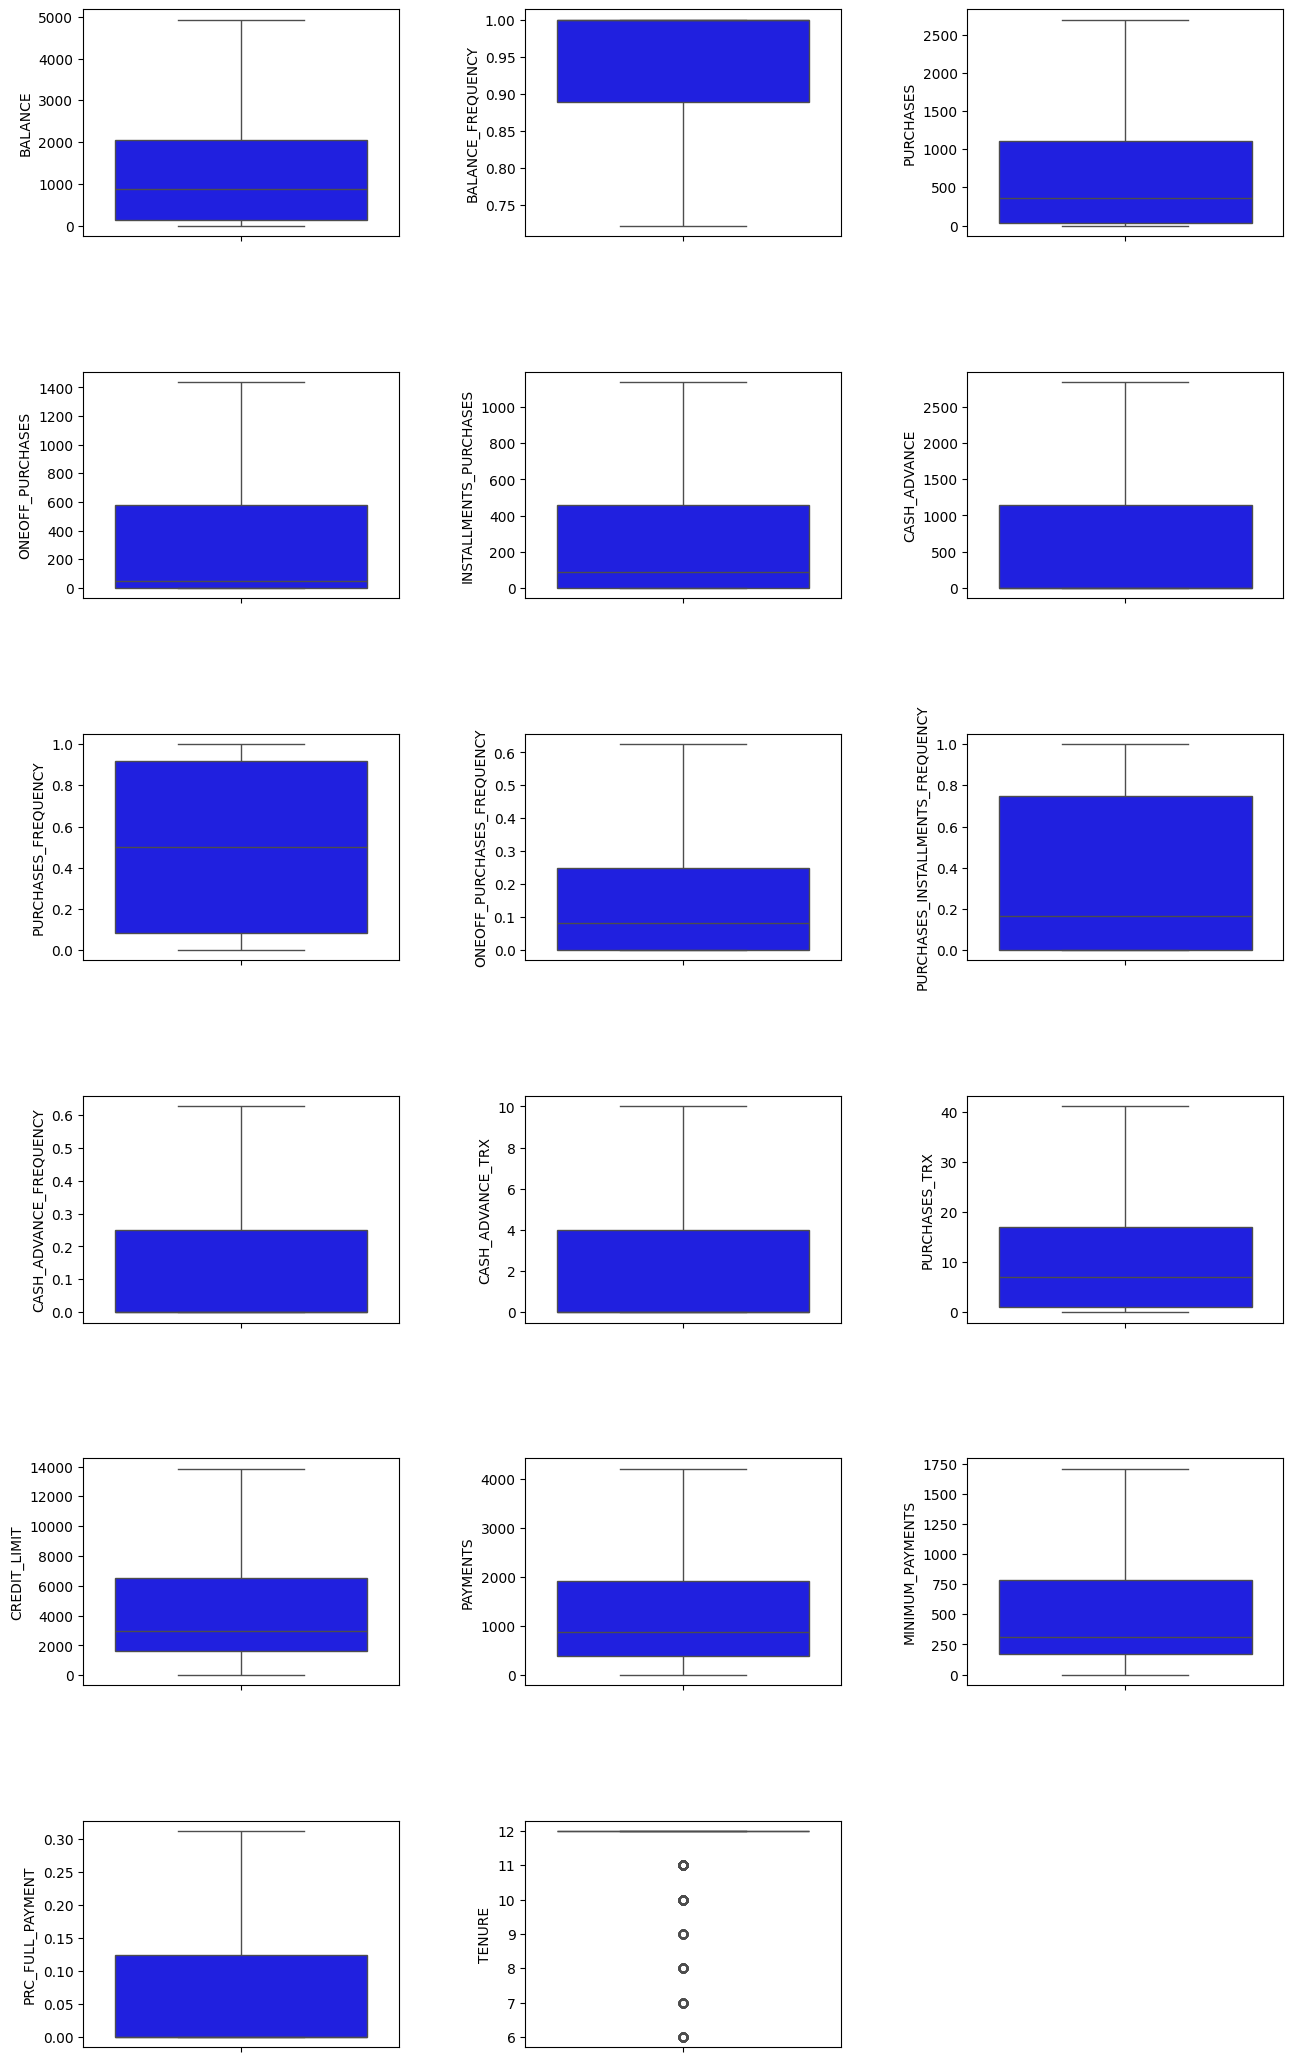

In [24]:
# After Winsorizer


# Set the size of the overall figure
plt.figure(figsize=(15, 30))  # Increase figure height to accommodate longer titles

# Adjust the spacing between subplots
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.6)  # Adjust hspace as needed

# Iterate over each column in the DataFrame
for i, column in enumerate(data_capped.columns, 1):
    # Create a subplot for each column
    plt.subplot(7, 3, i)
    
    # Create a vertical boxplot for the current column
    sns.boxplot(data_capped[column], color='blue')

    # Rotate the x-axis labels to prevent overlap
    plt.xticks(rotation=45)


# Show the plot
plt.show()

outlier sudah dihandle, dan tidak dilakukan outlier handling pada tenure karena variansi nilai tidak terlalu besar

**Scaller**

In [25]:
# Feature scaling
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_capped)

Melakukan Scalling dengan menggunakan StandardScaler karena K-Means dan PCA menggunakan perhitungan jarak antar titik data. Perhitungan jarak ini sangat dipengaruhi oleh skala fitur. Jika fitur memiliki skala yang berbeda, fitur dengan nilai yang lebih besar akan memiliki dampak yang lebih besar pada perhitungan jarak, yang dapat menghasilkan hasil yang tidak akurat.

**Dimensionality Reduction**

In [26]:
pca = PCA()
pca.fit(data_scaled)

PCA()

In [27]:
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio


array([0.31318918, 0.24288683, 0.09124748, 0.0789922 , 0.06266193,
       0.05040506, 0.03875916, 0.03155077, 0.02506998, 0.01891273,
       0.01277594, 0.01058882, 0.0075629 , 0.00671923, 0.00380369,
       0.00321767, 0.00165643])

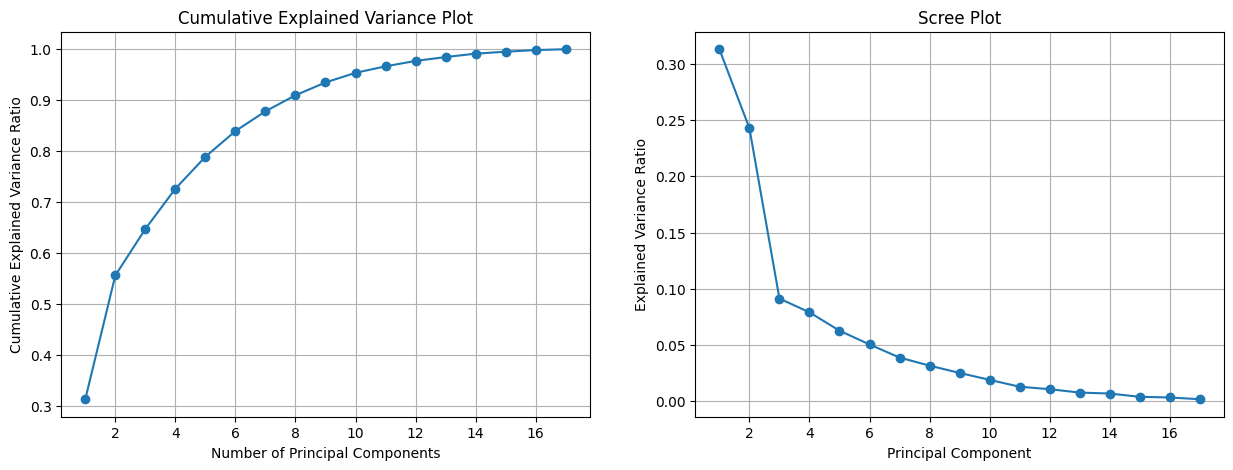

In [28]:
# Scree plot
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 2)
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.title('Scree Plot')

cumulative_explained_variance = np.cumsum(explained_variance_ratio)
plt.subplot(1, 2, 1)
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Plot')
plt.grid(True)
plt.show()

Tujuan PCA adalah untuk menggambarkan ulang data dalam bentuk dimensi yang lebih rendah agar lebih mudah dipahami tanpa kehilangan informasi yang penting. Disini kita akan meretain 95% data dan dari hasil visualisasi dapat dilihat bahwa feature yang dapat dipertahanakan dalam upaya retaining 95% data adalah pada 10 feature yang ada 

In [29]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
num_features = np.argmax(cumsum >= 0.95) + 1
num_features

10

In [30]:
# Let's train the model with 95 % of the original dataset information

pca = PCA(n_components=0.95)
pca.fit(data_scaled)

data_scaled_pca = pca.transform(data_scaled)

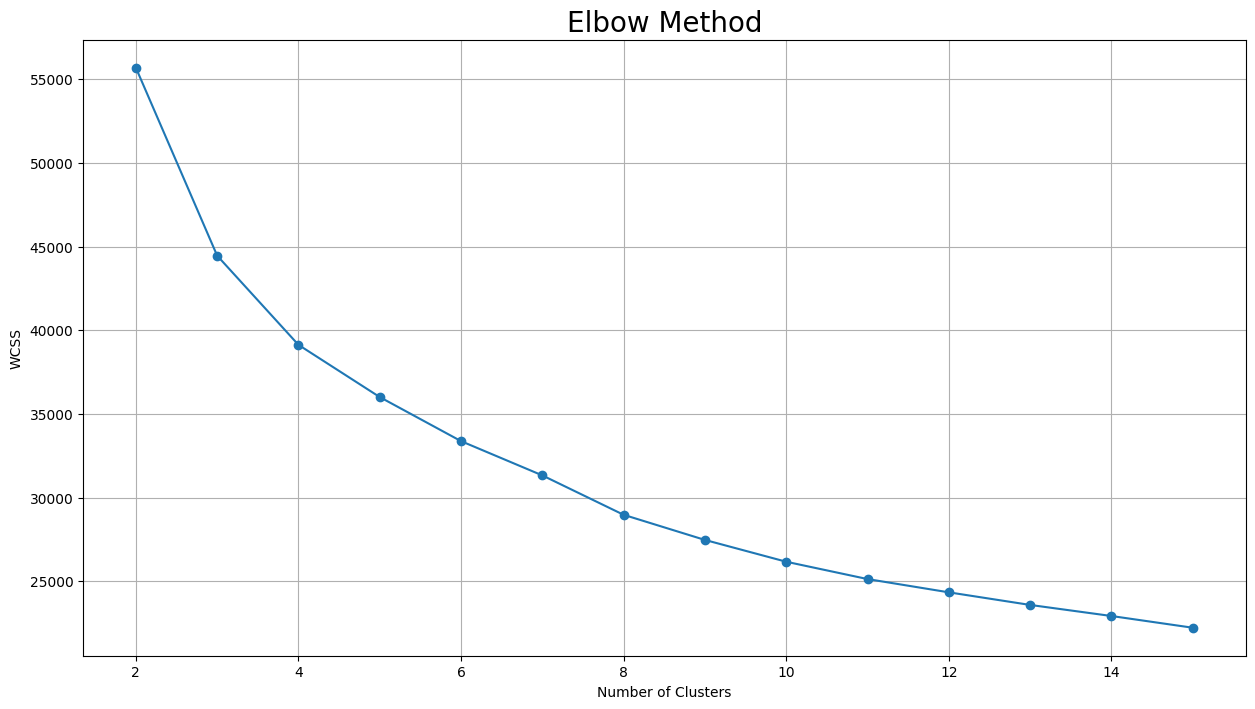

In [31]:
wcss = []
random_state = 10
max_cluster = 15
for i in range(2, max_cluster+1):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = random_state)
    km.fit(data_scaled_pca)
    wcss.append(km.inertia_)

plt.plot(range(2, max_cluster+1), wcss, marker ="o")
plt.grid()
plt.title('Elbow Method', fontsize = 20)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Penurunan dalam nilai inertia (atau sum squared distances) antara cluster tidak terlalu signifikan setelah mencapai 3 atau 4 cluster.Menunjukkan bahwa jumlah cluster yang optimal kemungkinan berada di antara 3 dan 4

In [32]:
# Function to create Silhouette Plot

import matplotlib.cm as cm
from sklearn.metrics import silhouette_score,silhouette_samples

def plot_silhouette(range_n_clusters, X, random_state):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 4)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_

        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

For n_clusters = 2 The average silhouette_score is : 0.23148939857730633
For n_clusters = 3 The average silhouette_score is : 0.24035701424486855
For n_clusters = 4 The average silhouette_score is : 0.2112639890776119
For n_clusters = 5 The average silhouette_score is : 0.20258305467547189
For n_clusters = 6 The average silhouette_score is : 0.20571039815535289
For n_clusters = 7 The average silhouette_score is : 0.20667030287327962
For n_clusters = 8 The average silhouette_score is : 0.21785014777922798
For n_clusters = 9 The average silhouette_score is : 0.21329153452516822
For n_clusters = 10 The average silhouette_score is : 0.21037307028367036
For n_clusters = 11 The average silhouette_score is : 0.2081553701055183
For n_clusters = 12 The average silhouette_score is : 0.20784476378897243
For n_clusters = 13 The average silhouette_score is : 0.20526776565901345
For n_clusters = 14 The average silhouette_score is : 0.20748113386193182


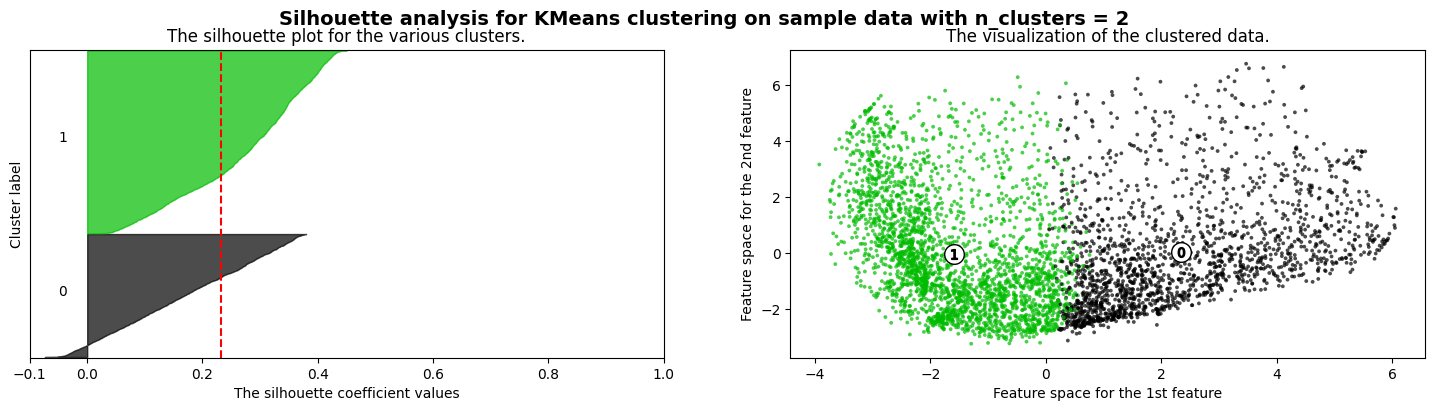

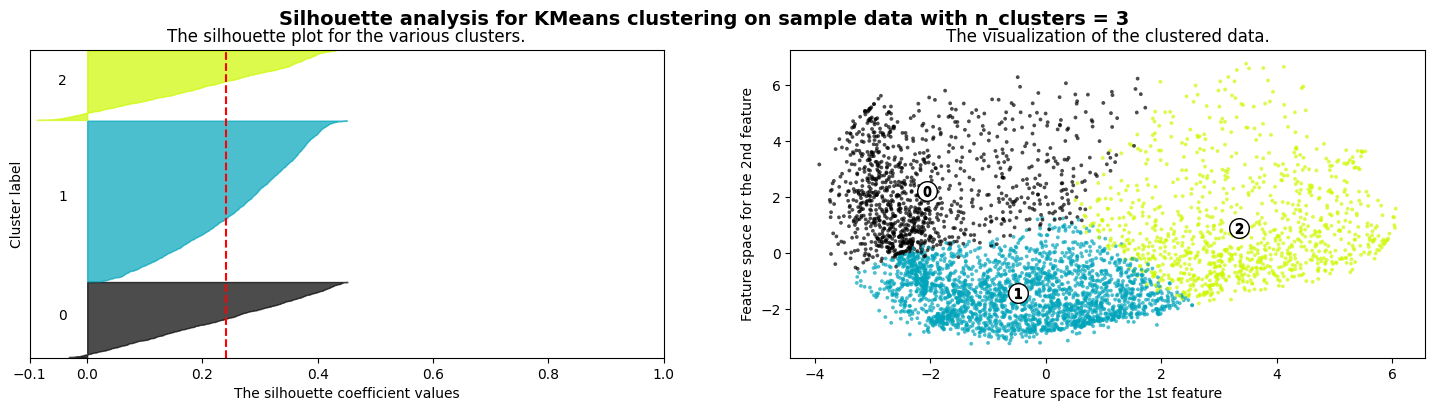

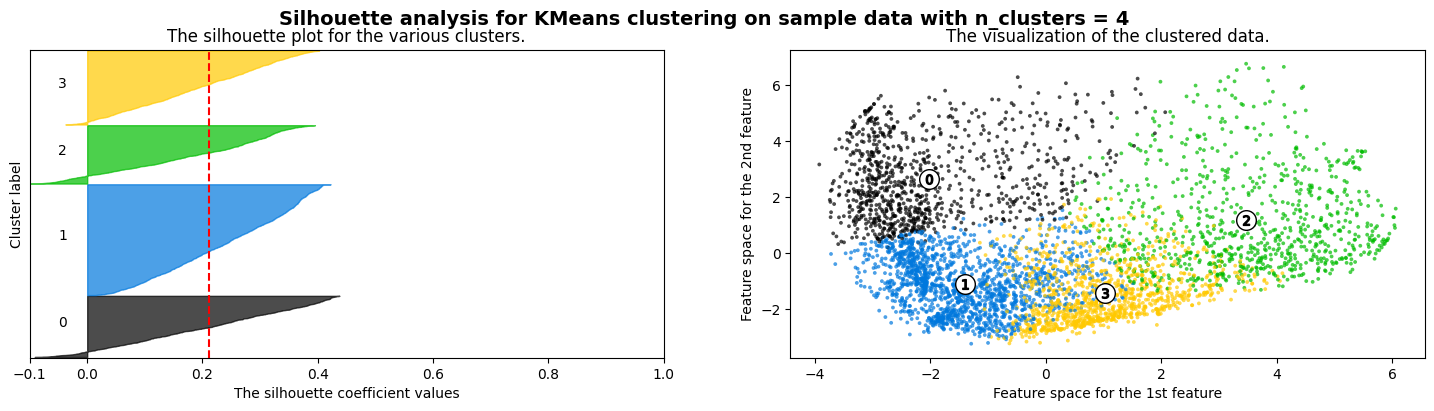

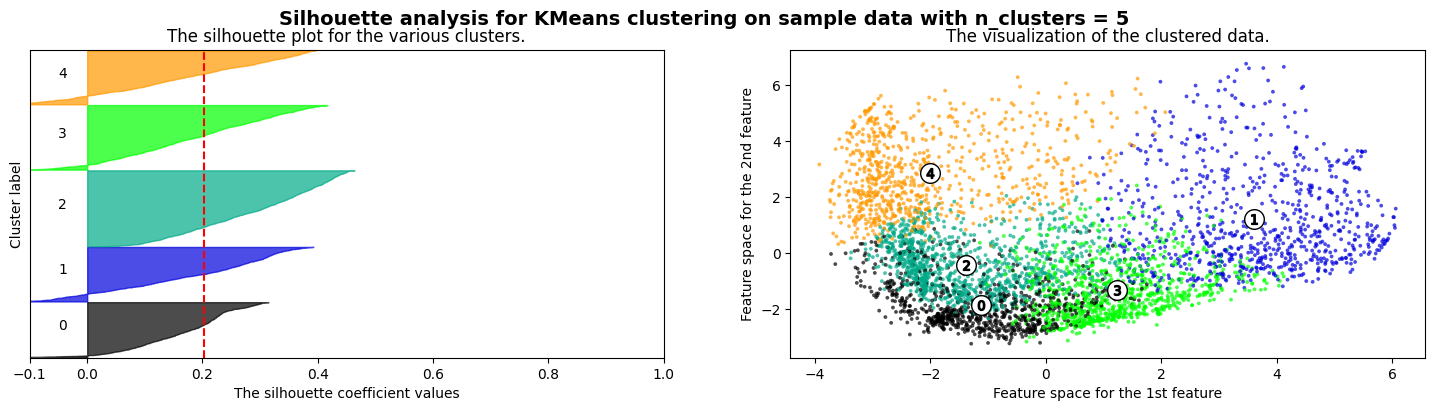

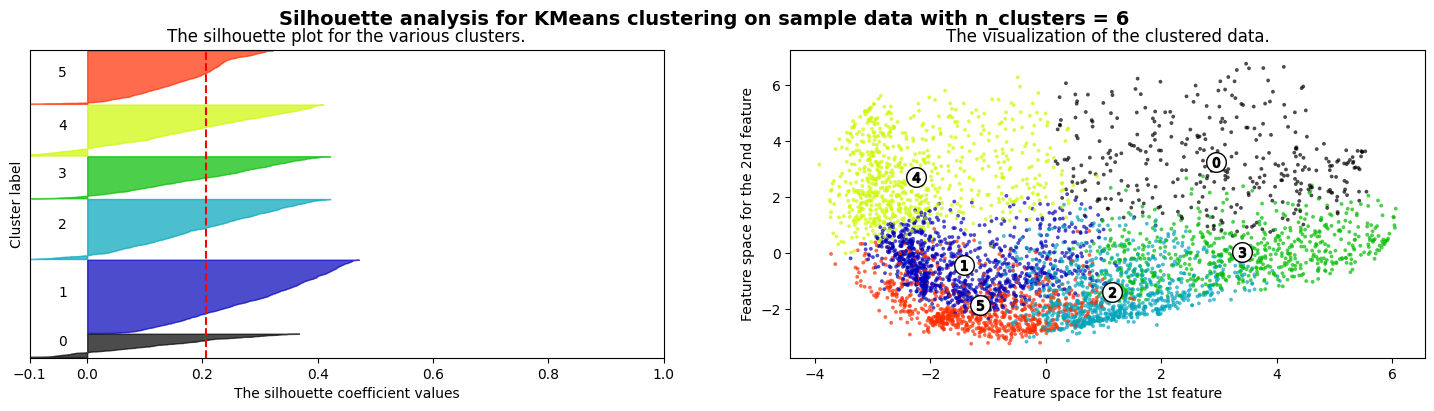

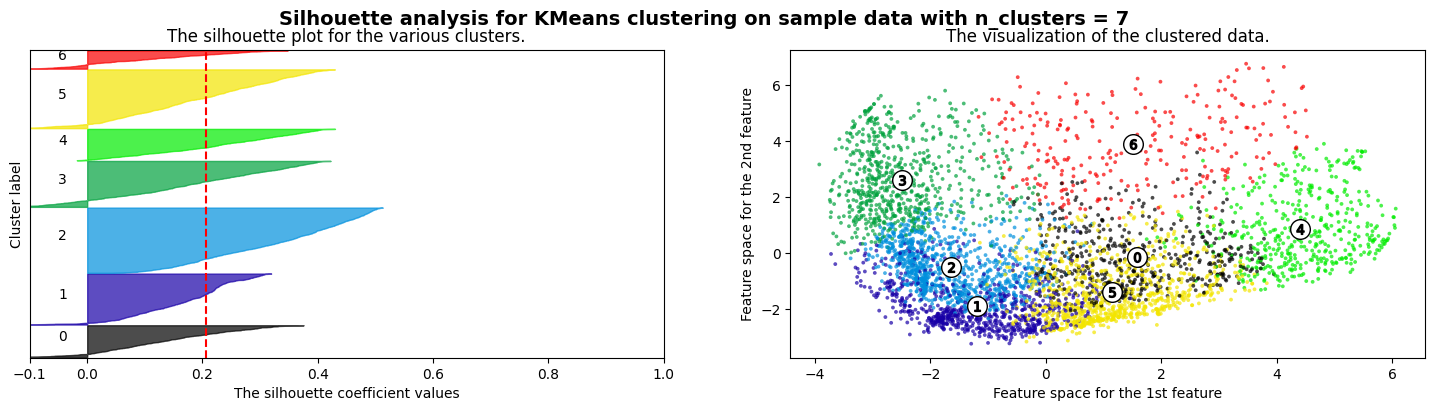

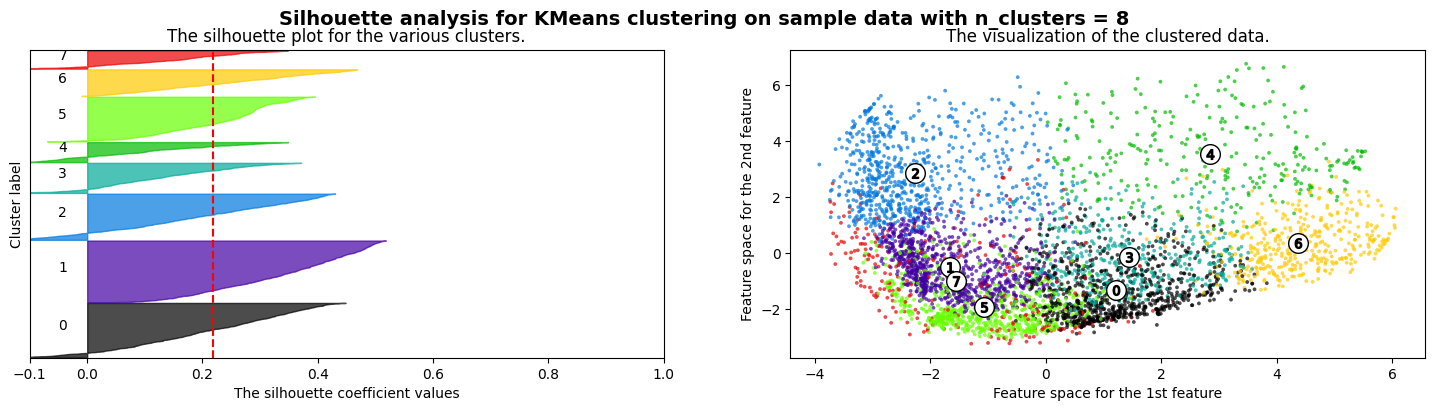

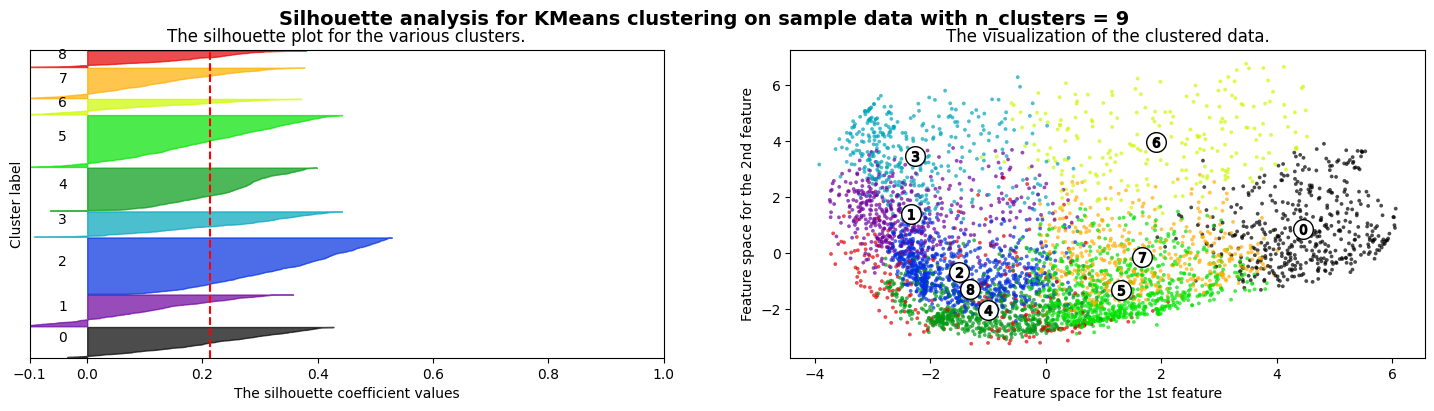

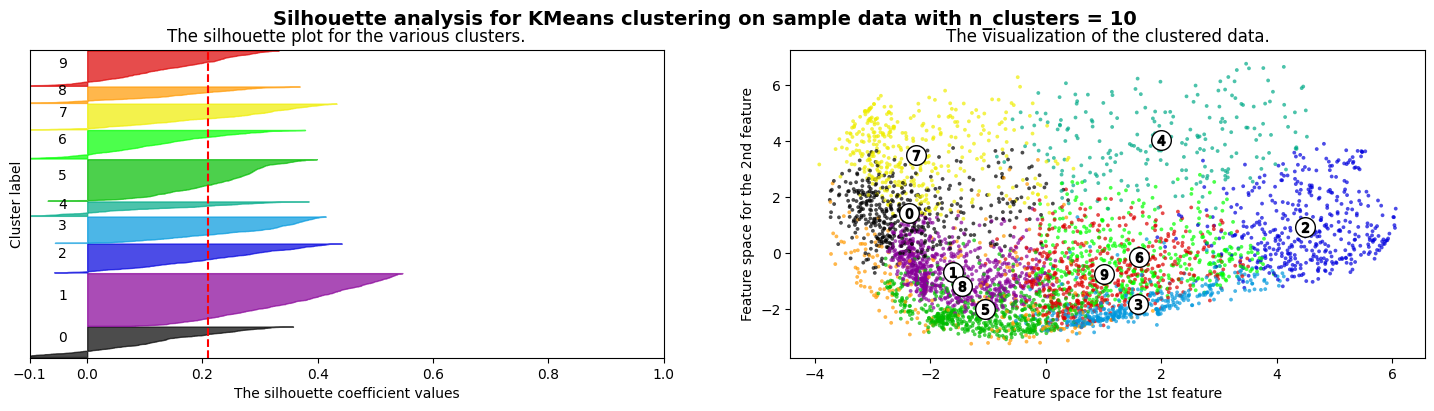

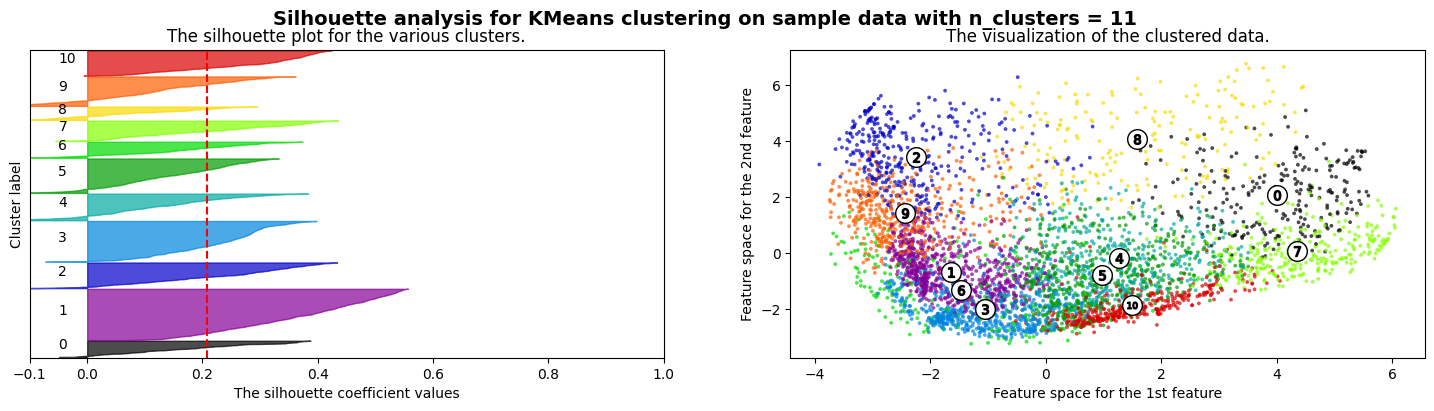

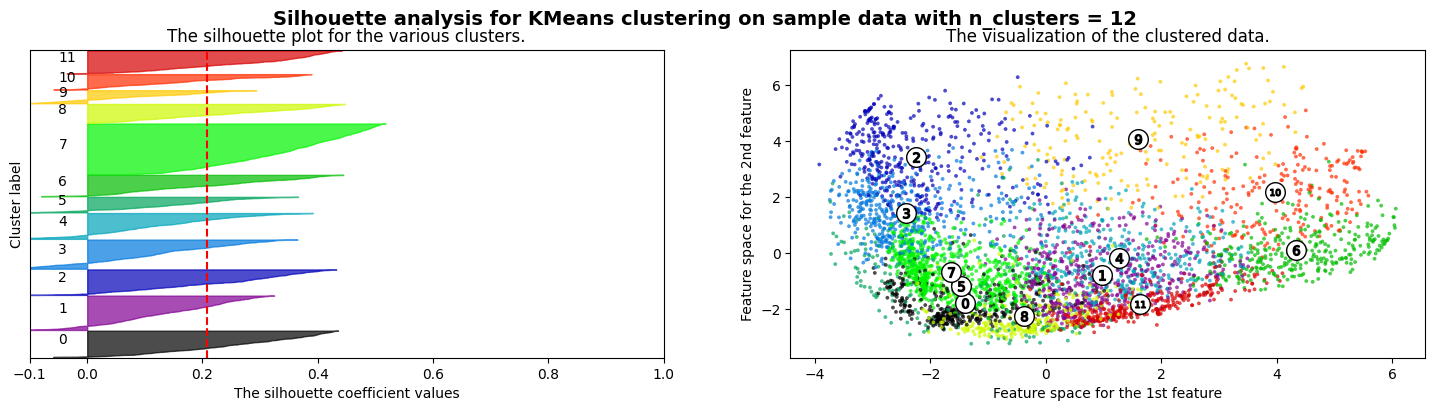

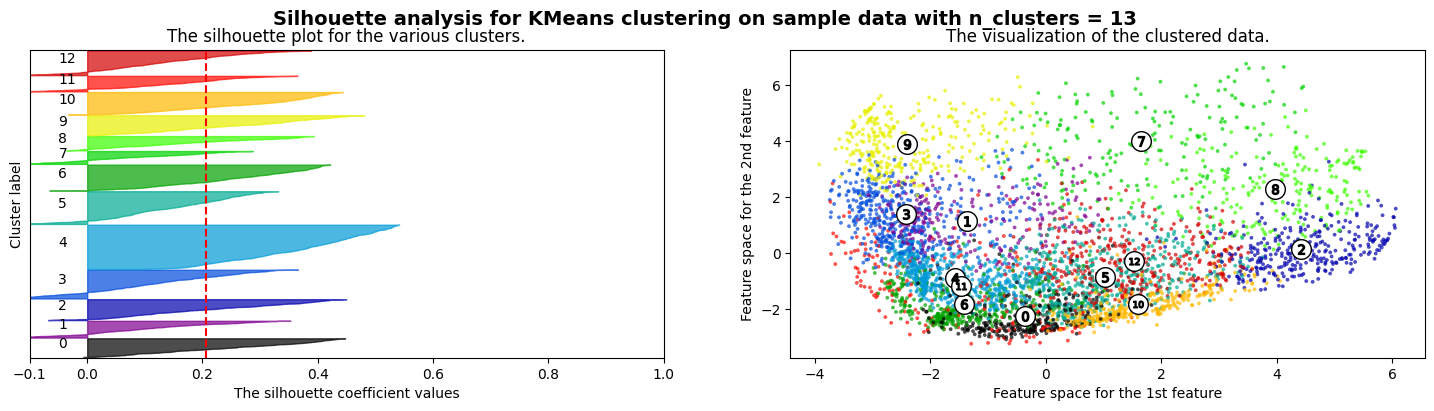

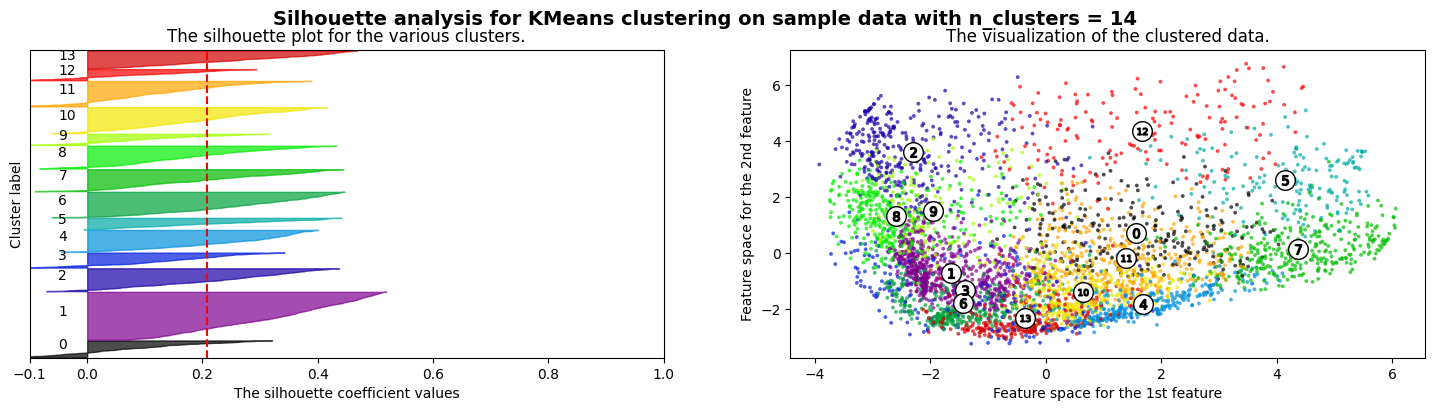

In [33]:
# Display the Silhouette Score and Plot Silhouette Plot

plot_silhouette(range(2, max_cluster), data_scaled_pca, random_state)

Sebelumnya melalui methode elbow, kita bisa melihat bahwa jumlah cluster yang tepat berada di antara nilai cluster 3 atau 4, maka dalam hasil menggunakan sillhouete method ini kita berfokus pada score dari cluster n = 3 atau n = 4. Dilihat dari sillhouete scorenya, nilai n = 3 paling mendekati angka  dengn nilai 0.24035701424486855

**Model Definition**

In [34]:
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)


**Model Training**

In [35]:
pred = km.fit_predict(data_scaled_pca)
pred

array([1, 1, 1, ..., 0, 0, 0])

In [36]:
# Insert clustering result into original dataset

data_original['CLUSTER'] = pred

data_original

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0        3091     3.833185              0.125      45.00             45.00   
1        5069     0.000000              0.000     176.03            176.03   
2        6075   757.964752              0.875     157.40            157.40   
3        6291   264.566591              0.375    1150.00           1150.00   
4        7755   440.613643              1.000     600.00            600.00   
...       ...          ...                ...        ...               ...   
4470     2345  9629.808851              1.000       0.00              0.00   
4471     6785  1040.030221              1.000       0.00              0.00   
4472     7347  1322.818587              1.000       0.00              0.00   
4473     8447  1060.391273              1.000       0.00              0.00   
4474     1995  3447.674222              1.000     205.00            205.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                        0.0      0.000000             0.125000   
1                        0.0      0.000000             0.125000   
2                        0.0      0.000000             0.125000   
3                        0.0      0.000000             0.125000   
4                        0.0      0.000000             0.125000   
...                      ...           ...                  ...   
4470                     0.0   4372.393835             0.000000   
4471                     0.0   1390.648290             0.000000   
4472                     0.0    762.301096             0.000000   
4473                     0.0   1475.858013             0.000000   
4474                     0.0   4548.057776             0.090909   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.125000                               0.0   
1                       0.125000                               0.0   
2                       0.125000                               0.0   
3                       0.125000                               0.0   
4                       0.125000                               0.0   
...                          ...                               ...   
4470                    0.000000                               0.0   
4471                    0.000000                               0.0   
4472                    0.000000                               0.0   
4473                    0.000000                               0.0   
4474                    0.090909                               0.0   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              1         500.0   
1                   0.000000                 0              1        7000.0   
2                   0.000000                 0              6        1200.0   
3                   0.000000                 0              1        1200.0   
4                   0.000000                 0              1        1000.0   
...                      ...               ...            ...           ...   
4470                0.545455                 9              0       12000.0   
4471                0.545455                18              0        1400.0   
4472                0.545455                11              0        1500.0   
4473                0.545455                10              0        2000.0   
4474                0.545455                 7              1       10500.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  CLUSTER  
0        0.000000               NaN               0.0       8        1  
1        0.000000               NaN               0.0       8        1  
2     1494.480376       2638.598410               0.0       8        1  
3     3029.380326         85.428885               0.0       8        1  
4      215.316424        137.846006               0.0       8        1  
...           ...               ... 

**Model Evaluation**

<Axes: >

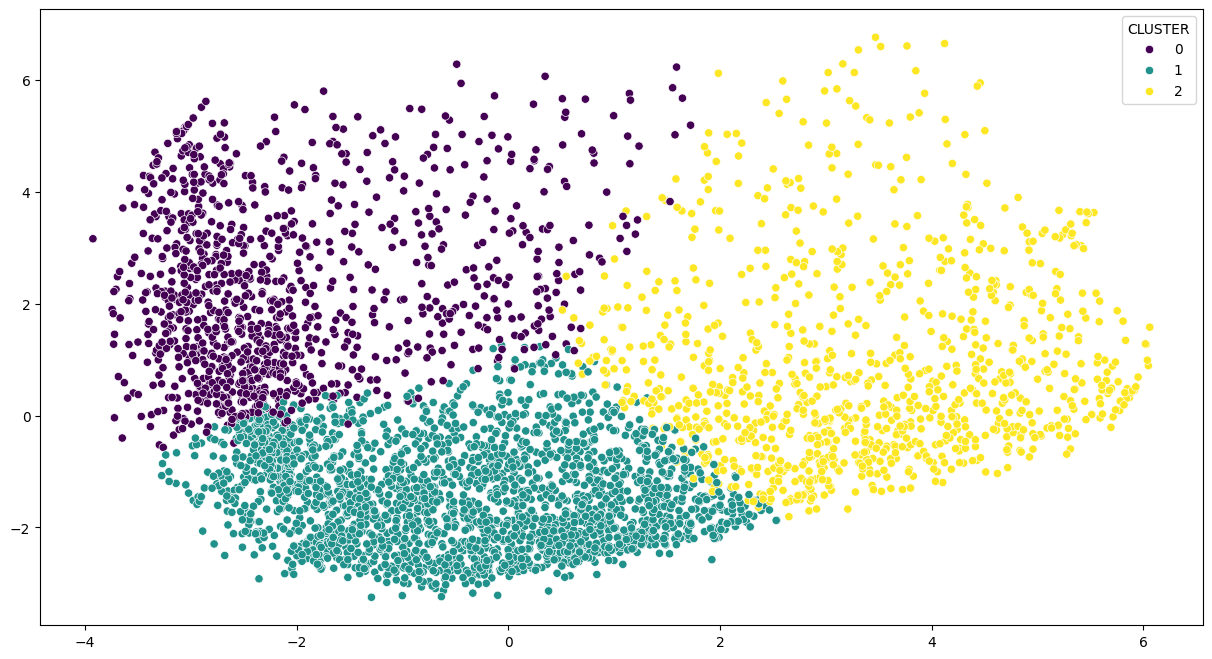

In [37]:
# Cluster visualization in 2D

pca_2d = PCA(n_components=2)
pca_2d.fit(data_scaled_pca)

data_scaled_pca_2d = pca_2d.fit_transform(data_scaled_pca)

sns.scatterplot(x=data_scaled_pca_2d[:,0], y=data_scaled_pca_2d[:,1], hue=data_original['CLUSTER'], palette='viridis')

Terdapat 3 cluster yang berhasil dibuat melalui metode K-means. Melalui gambar di atas bisa dilihat pembagian data points ke dalam kluster masih belum rapi, di mana terlihat pada data points masih terdapar overlapped. Selain itu pembagian klusternya juga belum begitu baik, tampak jarak antar kluster yang saling berdekatan.

In [38]:
data_original

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0        3091     3.833185              0.125      45.00             45.00   
1        5069     0.000000              0.000     176.03            176.03   
2        6075   757.964752              0.875     157.40            157.40   
3        6291   264.566591              0.375    1150.00           1150.00   
4        7755   440.613643              1.000     600.00            600.00   
...       ...          ...                ...        ...               ...   
4470     2345  9629.808851              1.000       0.00              0.00   
4471     6785  1040.030221              1.000       0.00              0.00   
4472     7347  1322.818587              1.000       0.00              0.00   
4473     8447  1060.391273              1.000       0.00              0.00   
4474     1995  3447.674222              1.000     205.00            205.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                        0.0      0.000000             0.125000   
1                        0.0      0.000000             0.125000   
2                        0.0      0.000000             0.125000   
3                        0.0      0.000000             0.125000   
4                        0.0      0.000000             0.125000   
...                      ...           ...                  ...   
4470                     0.0   4372.393835             0.000000   
4471                     0.0   1390.648290             0.000000   
4472                     0.0    762.301096             0.000000   
4473                     0.0   1475.858013             0.000000   
4474                     0.0   4548.057776             0.090909   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.125000                               0.0   
1                       0.125000                               0.0   
2                       0.125000                               0.0   
3                       0.125000                               0.0   
4                       0.125000                               0.0   
...                          ...                               ...   
4470                    0.000000                               0.0   
4471                    0.000000                               0.0   
4472                    0.000000                               0.0   
4473                    0.000000                               0.0   
4474                    0.090909                               0.0   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              1         500.0   
1                   0.000000                 0              1        7000.0   
2                   0.000000                 0              6        1200.0   
3                   0.000000                 0              1        1200.0   
4                   0.000000                 0              1        1000.0   
...                      ...               ...            ...           ...   
4470                0.545455                 9              0       12000.0   
4471                0.545455                18              0        1400.0   
4472                0.545455                11              0        1500.0   
4473                0.545455                10              0        2000.0   
4474                0.545455                 7              1       10500.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  CLUSTER  
0        0.000000               NaN               0.0       8        1  
1        0.000000               NaN               0.0       8        1  
2     1494.480376       2638.598410               0.0       8        1  
3     3029.380326         85.428885               0.0       8        1  
4      215.316424        137.846006               0.0       8        1  
...           ...               ... 

In [39]:
data_original['Variable'] = 'Variable'

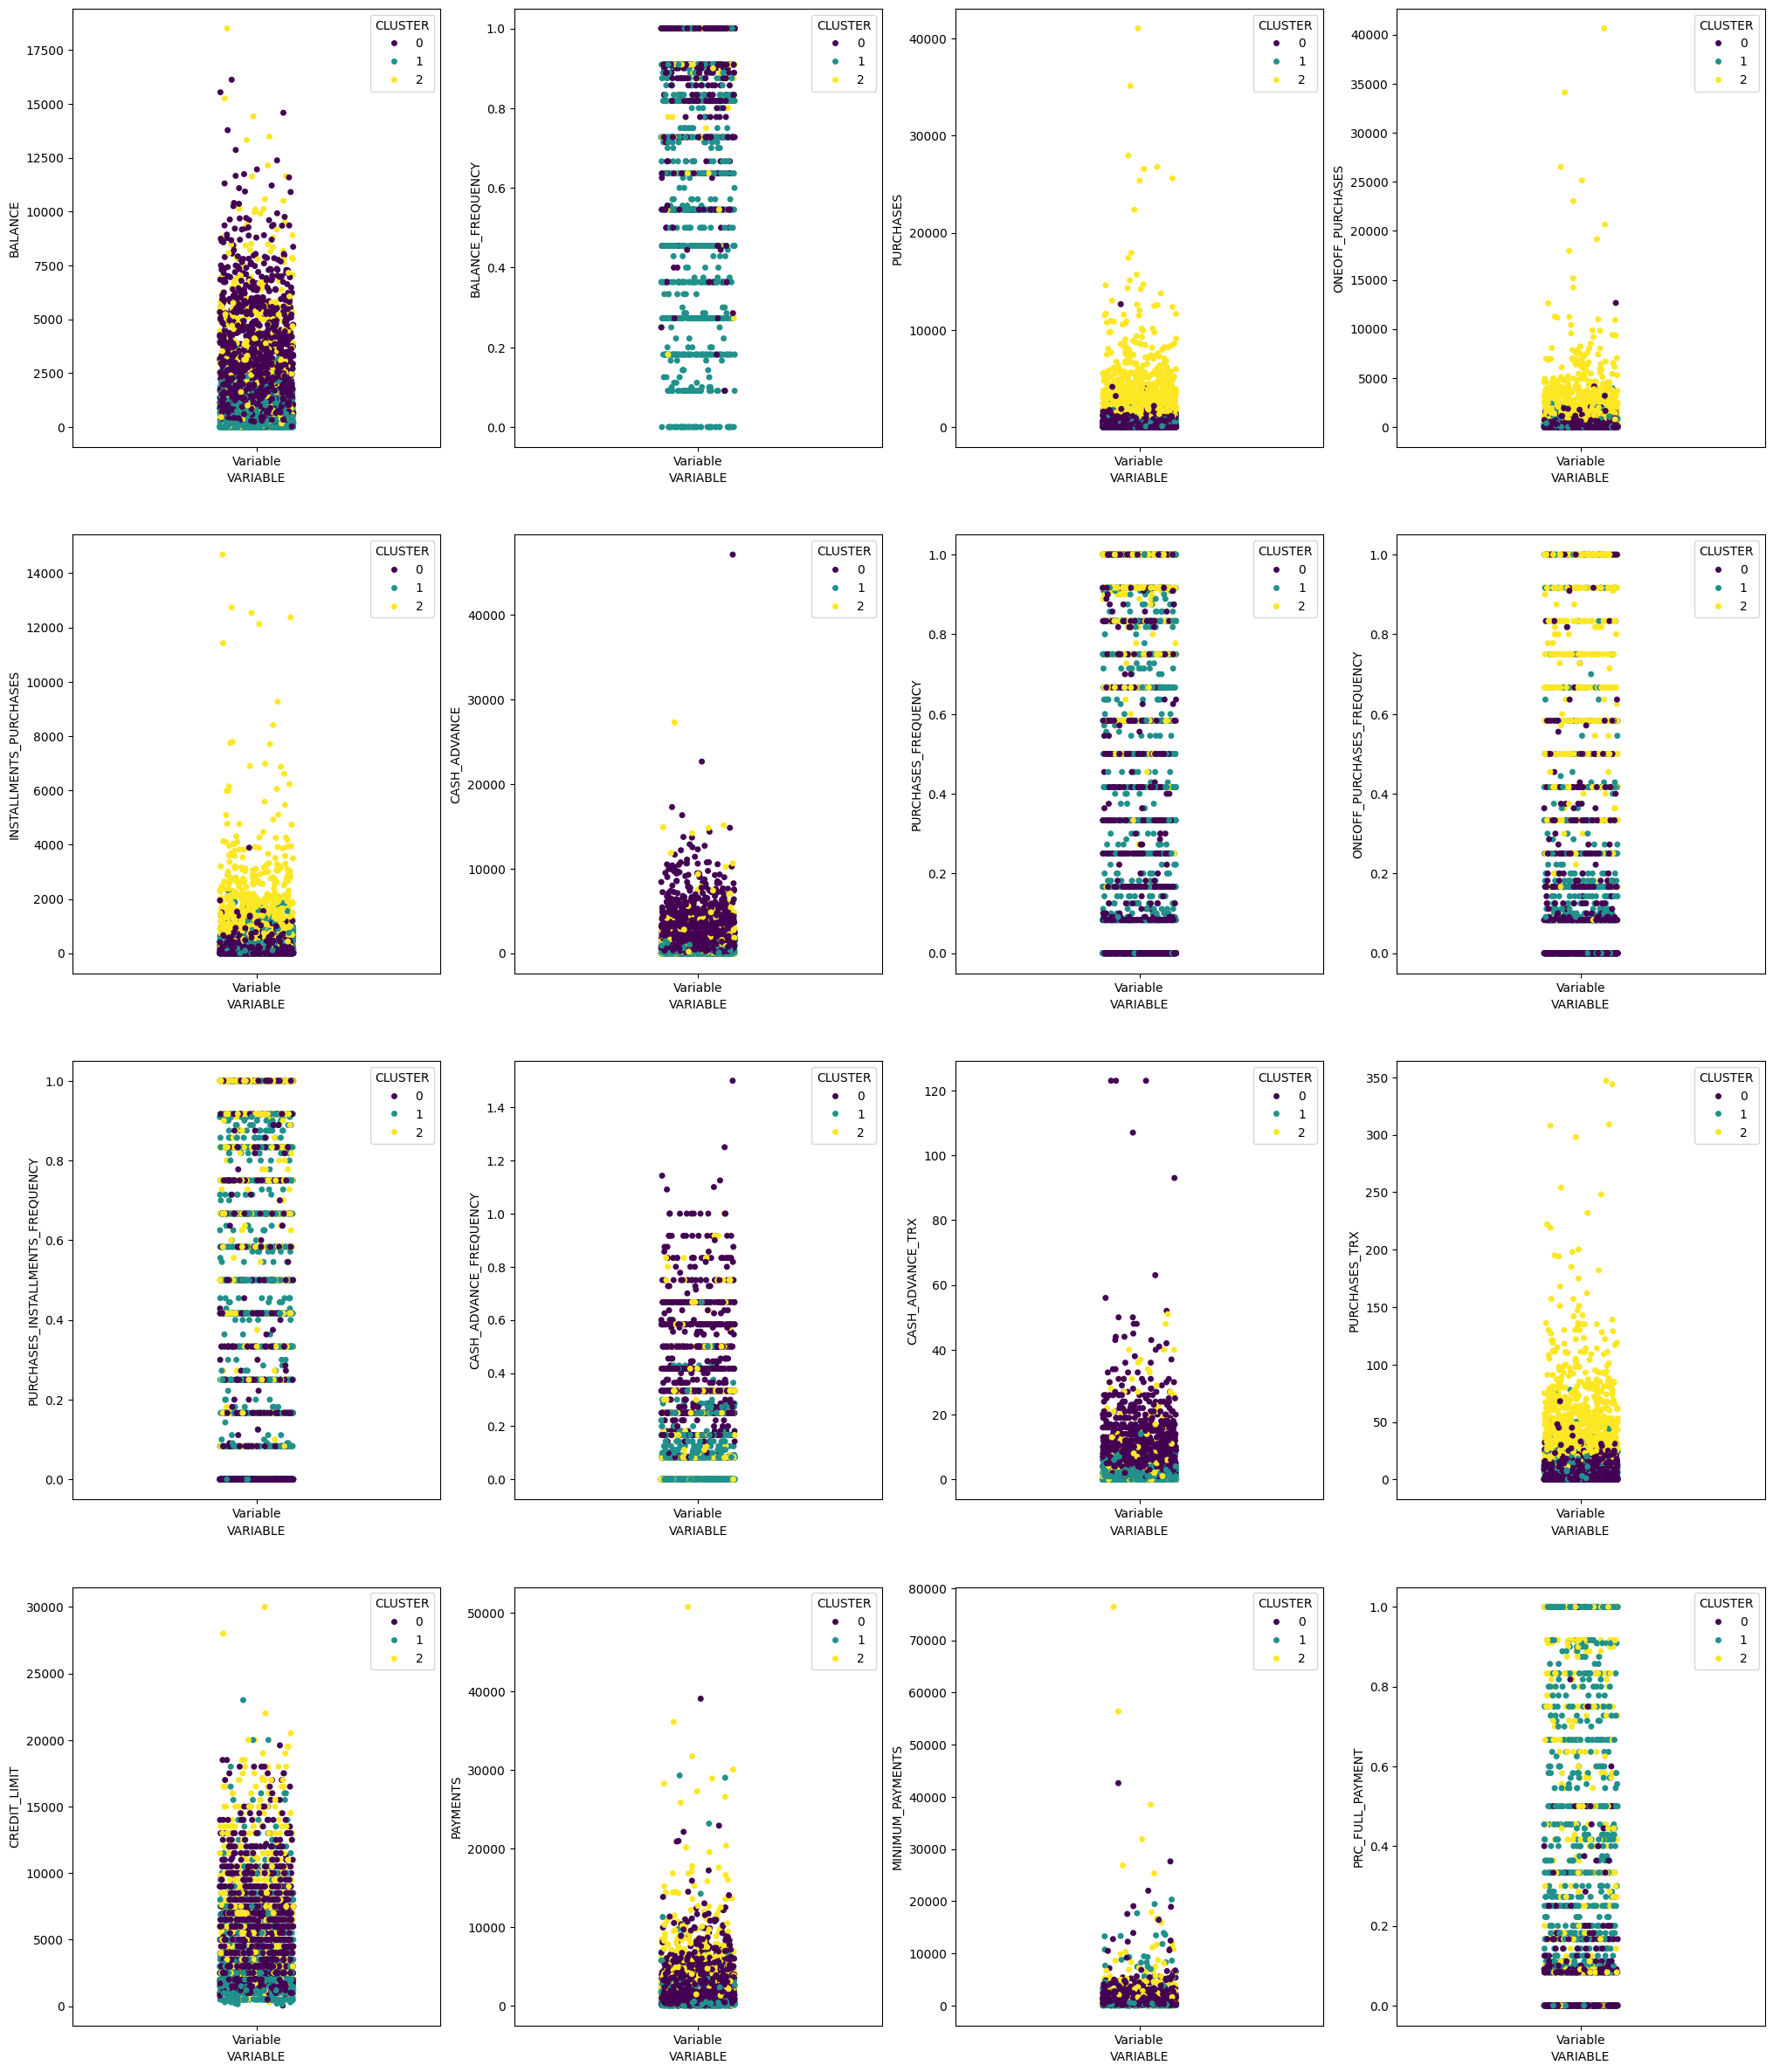

In [40]:
#EDA
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] =(25,30)

for num in range(0,16):
    ax = plt.subplot(4,4,num+1)
    col = data_original.columns[num+1]
    sns.stripplot(x = data_original['Variable'],y=data_original[col], data=data_original[1:], ax=ax, hue=data_original['CLUSTER'], palette='viridis')
    plt.xlabel('VARIABLE')
    

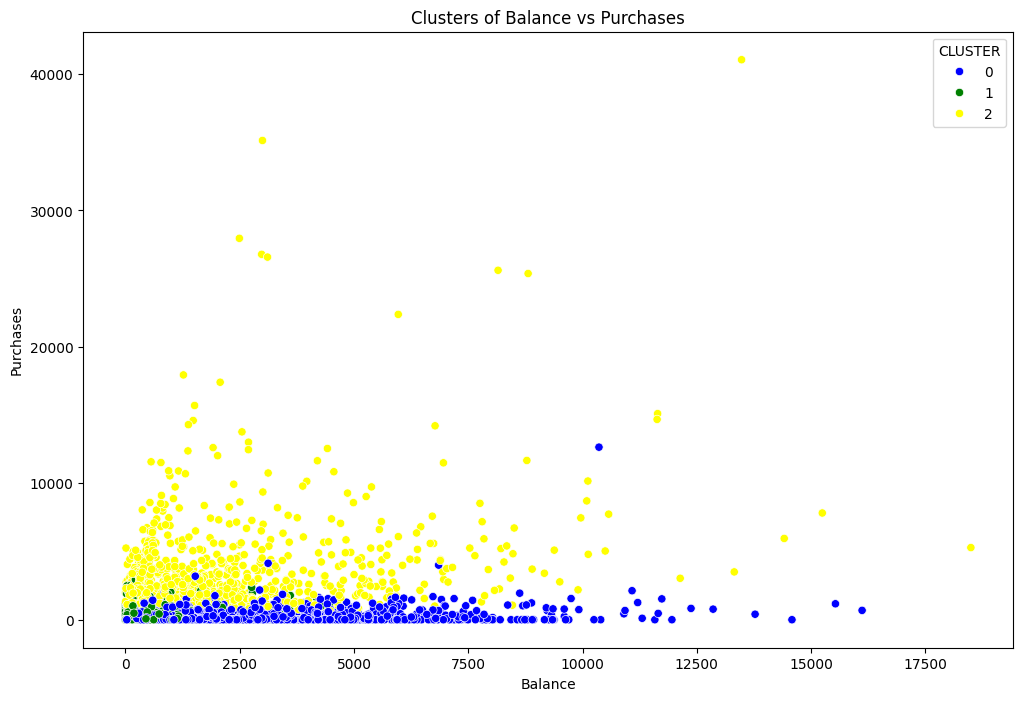

In [41]:
plt.rcParams['figure.figsize'] = (12, 8)
sns.scatterplot(x='BALANCE', y='PURCHASES', data=data_original, hue='CLUSTER', palette=['blue', 'green', 'yellow', 'red'])
plt.title('Clusters of Balance vs Purchases')
plt.xlabel('Balance')
plt.ylabel('Purchases')
plt.show()

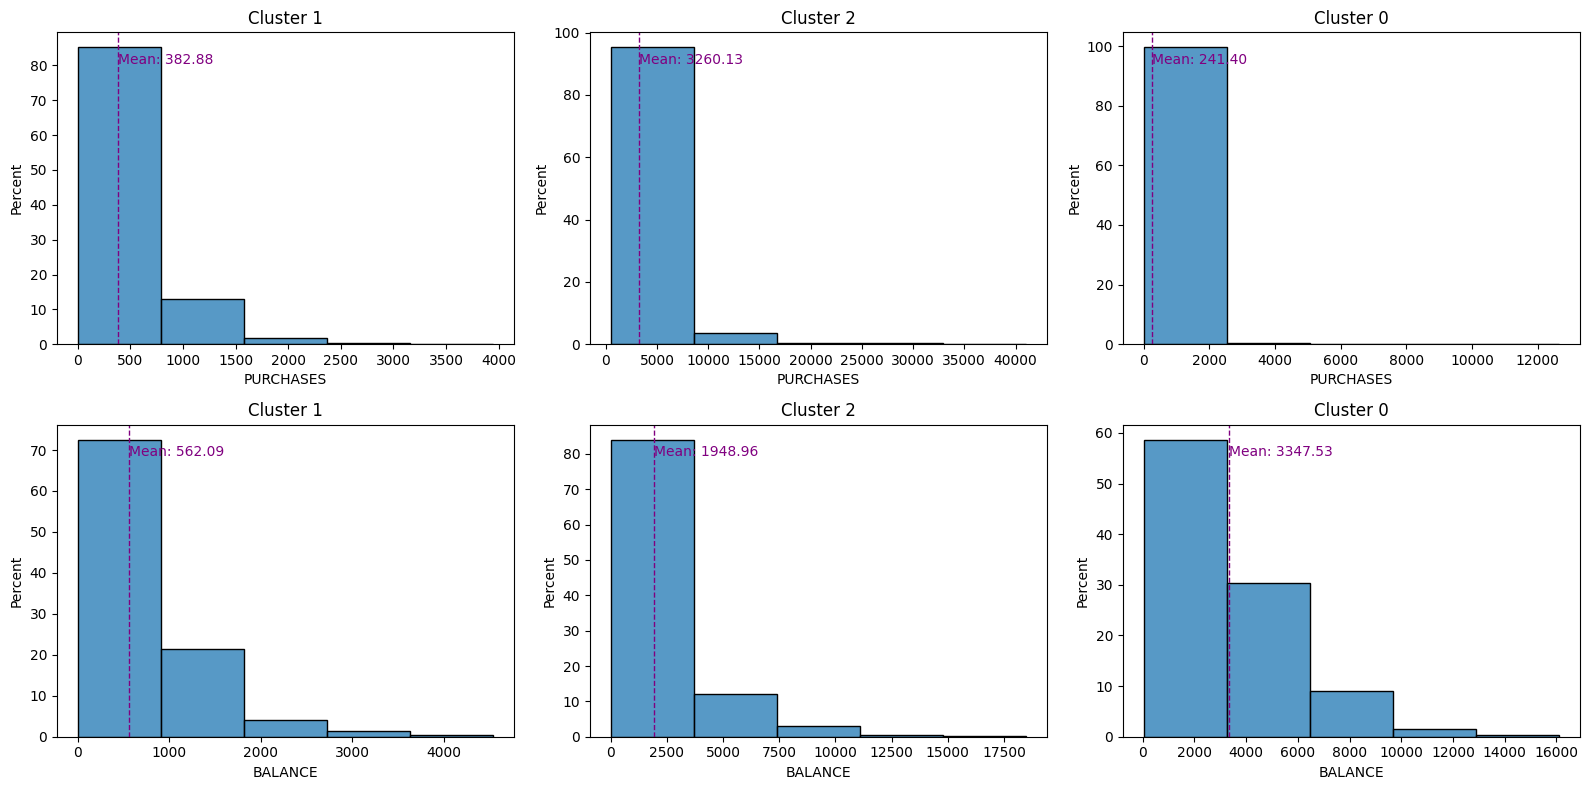

In [42]:
# Define the columns and clusters
cols = ['PURCHASES' ,'BALANCE']
clusters = data_original['CLUSTER'].unique()

# Set up subplots
num_rows = len(cols)
num_cols = len(clusters)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 4*num_rows))

# Loop through each feature
for i, col in enumerate(cols):
    # Loop through each cluster
    for j, cluster in enumerate(clusters):
        # Select data points belonging to the current cluster
        data = data_original[data_original['CLUSTER'] == cluster][col]
        # Plot histogram for the current cluster in the current subplot
        sns.histplot(data, bins=5, ax=axes[i, j], stat='percent')
        axes[i, j].set_title(f'Cluster {cluster}')
        axes[i, j].set_xlabel(col)
        axes[i, j].set_ylabel('Percent')
        
        # Calculate mean
        mean_value = np.mean(data)
        # Annotate with mean value
        axes[i, j].axvline(mean_value, color='purple', linestyle='--', linewidth=1)
        axes[i, j].text(mean_value, axes[i, j].get_ylim()[1]*0.9, f'Mean: {mean_value:.2f}', color='purple')

# Adjust layout
plt.tight_layout()
plt.show()

Pada visualisasi di atas dapat dilihat bahwa terdapat 3 cluster yang membagi klasifikasi customer pada pengguna kartu kredit. Kita dapat melihat tingginya aktivitas transaksi dari kartu kredit yang digunakan oleh customer dengan melihat jumlah balance dan purchase yang dilakukan oleh kartu kredit customer. Cluster 2 dan 0 cenderung lebih banyak melakukan purchase dan memliki balance yang lebih tinggi juga. Dapat dilihat bahwa customer yang masuk ke dalam cluster 2 dapat dikatakan sebagai highest spender, cluster 0 sebagai moderate spender dan cluster 1 sebagai low spender

**Model Saving**

In [43]:
# Save the pipeline to a .pkl file
dump(km, 'K_Means_Model.pkl')

# Save scaler
with open('scaler.pkl', 'wb') as Scaler:
  pickle.dump(scaler, Scaler)

# Save PCA
with open('pca.pkl', 'wb') as PCA:
  pickle.dump(pca, PCA)

**Model Inference**

In [44]:
#Memuat Scaler
with open('scaler.pkl', 'rb') as Scaler_Load:
    scaler = pickle.load(Scaler_Load)

# Memuat PCA 
with open('pca.pkl', 'rb') as PCA_Load:
    pca = pickle.load(PCA_Load)


# Memuat model
loaded_model = load('K_Means_Model.pkl')

In [45]:
data_original

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0        3091     3.833185              0.125      45.00             45.00   
1        5069     0.000000              0.000     176.03            176.03   
2        6075   757.964752              0.875     157.40            157.40   
3        6291   264.566591              0.375    1150.00           1150.00   
4        7755   440.613643              1.000     600.00            600.00   
...       ...          ...                ...        ...               ...   
4470     2345  9629.808851              1.000       0.00              0.00   
4471     6785  1040.030221              1.000       0.00              0.00   
4472     7347  1322.818587              1.000       0.00              0.00   
4473     8447  1060.391273              1.000       0.00              0.00   
4474     1995  3447.674222              1.000     205.00            205.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                        0.0      0.000000             0.125000   
1                        0.0      0.000000             0.125000   
2                        0.0      0.000000             0.125000   
3                        0.0      0.000000             0.125000   
4                        0.0      0.000000             0.125000   
...                      ...           ...                  ...   
4470                     0.0   4372.393835             0.000000   
4471                     0.0   1390.648290             0.000000   
4472                     0.0    762.301096             0.000000   
4473                     0.0   1475.858013             0.000000   
4474                     0.0   4548.057776             0.090909   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.125000                               0.0   
1                       0.125000                               0.0   
2                       0.125000                               0.0   
3                       0.125000                               0.0   
4                       0.125000                               0.0   
...                          ...                               ...   
4470                    0.000000                               0.0   
4471                    0.000000                               0.0   
4472                    0.000000                               0.0   
4473                    0.000000                               0.0   
4474                    0.090909                               0.0   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              1         500.0   
1                   0.000000                 0              1        7000.0   
2                   0.000000                 0              6        1200.0   
3                   0.000000                 0              1        1200.0   
4                   0.000000                 0              1        1000.0   
...                      ...               ...            ...           ...   
4470                0.545455                 9              0       12000.0   
4471                0.545455                18              0        1400.0   
4472                0.545455                11              0        1500.0   
4473                0.545455                10              0        2000.0   
4474                0.545455                 7              1       10500.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  CLUSTER  \
0        0.000000               NaN               0.0       8        1   
1        0.000000               NaN               0.0       8        1   
2     1494.480376       2638.598410               0.0       8        1   
3     3029.380326         85.428885               0.0       8        1   
4      215.316424        137.846006               0.0       8        1   
...           ...             

In [46]:
data_sample = {
    'BALANCE': '40000',
    'BALANCE_FREQUENCY': '0.375',
    'PURCHASES': '176.03',
    'ONEOFF_PURCHASES': '45.0',
    'INSTALLMENTS_PURCHASES': '0.0',
    'CASH_ADVANCE': '4372.393835',
    'PURCHASES_FREQUENCY': '0.125',
    'ONEOFF_PURCHASES_FREQUENCY': '0.125',
    'PURCHASES_INSTALLMENTS_FREQUENCY': '0.0',
    'CASH_ADVANCE_FREQUENCY': '0.0',
    'CASH_ADVANCE_TRX': '0',
    'PURCHASES_TRX': '1',
    'CREDIT_LIMIT': '500.0',
    'PAYMENTS': '0.0',
    'MINIMUM_PAYMENTS': '150.0',
    'PRC_FULL_PAYMENT': '0.0',
    'TENURE': '5'
}

df_sample = pd.DataFrame.from_dict(data_sample, orient='index').T


In [47]:
# Memanggil Scaler
new_data_scaled = scaler.transform(df_sample)

# Memanggil PCA 
new_data_PCA = pca.transform(new_data_scaled)

# Membuat Prediksi Cluster
prediction = loaded_model.predict(new_data_PCA)

print("Prediction:", prediction)

Prediction: [0]


**Conclusion**


Business Conclusion : Melalui informasi dari analisis klaster ini, sebagai perusahaan kartu kredit, kita bisa menghabiskan lebih banyak waktu untuk kampanye pemasaran kepada orang yang tepat. Orang-orang di klaster 0 dan 2 jelas memiliki kapasitas untuk berbelanja dan karena mereka sudah berbelanja, kita bisa menggunakan kebiasaan berbelanja mereka untuk mengoptimalkan strategi agar mereka berbelanja lebih banyak lagi. Analisis juga memberi kita insight bahwa customer yang masuk ke dalam cluster 1 memiliki saldo dan limit yang cukup namun belum menggunakan kartu kredit mereka dengan optimal. Perlu dilakukan pendekatan yang lebih personalized untuk mendorong mereka menggunakan kartu kredit mereka dengan optimal

Model Conclusion : Clustering yang dilakukan berhasil mengklasifikasi data menjadi 3 cluster, namun dari hasil visualisasi pembagian data points ke dalam kluster masih belum rapi, di mana terlihat pada data points masih terdapar overlapped. Selain itu pembagian klusternya juga belum begitu baik, tampak jarak antar kluster yang saling berdekatan. Ada banyak hal yang bisa mempengaruhi terciptanya kondisi seperti ini, ada kemungkinan diantaranya adalah  Fitur-fitur yang digunakan untuk clustering mungkin tidak cukup relevan atau tidak memadai untuk memisahkan data dengan baik atau juga dengan mencoba algoritma clustering alternatif yang mungkin lebih cocok untuk struktur data seperti K-Means++, Hierarchical Clustering, atau DBSCAN.

**Conceptual Problems**

1. Apakah yang dimaksud dengan inertia pada algoritma K-Means ?

Inertia pada algoritma K-Means adalah suatu metrik yang digunakan untuk mengevaluasi seberapa baik model K-Means  memisahkan data ke dalam kluster- klusternya. Inertia dalam K-Means dapat memberikan informasi yang berguna tentang bagaimana data tersebar di sekitar pusat-pusat kluster dimana inertia mengukur jarak antara data points dan pusat kluster terdekatnya, ia tidak sensitif terhadap keberadaan outlier.





2. Jelaskan yang dimaksud dengan Elbow Method (alasan penggunaan, cara penggunaan, kelemahan/kelebihan, dll) !

Elbow Method adalah metode yang digunakan untuk menentukan jumlah kluster yang optimal dalam algoritma K-Means. Metode ini didasarkan pada plot inertia terhadap jumlah kluster yang digunakan untuk clustering. Tujuan utama dari Elbow Method adalah untuk menemukan titik di plot di mana penurunan inertia berkurang secara signifikan, yang menunjukkan bahwa penambahan kluster tidak memberikan peningkatan yang signifikan dalam pemisahan data.

Cara penggunaannya adalah dengan melakukan visualisai plot nilai inertia terhadap jumlah cluster dan melihat di titik jumlah cluster berapa yang plotnya berberntuk seperti siku,dimana titir tersebut menunjukan jumlah kluster yang optimal. Kelebihan dari metode elbow adalah metode ini merupakan metode sederhana dan mudah untuk diimplementasikan dalam menentukan jumlah kluster yang optimal, namun kekurangannya, sulit untuk menentukan dititik pada cluster berapa plot berbetuk seperti siku.